In [1]:
#import librosa
import os as os
import pandas as pd
import re
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import cm, colors, colorbar
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
rdg = RidgeClassifier(alpha=0.5)
#mlp=MLPClassifier(random_state=1,max_iter=300,activation='relu',solver='sgd',learning_rate='constant',learning_rate_init=0.0001)
mlp=MLPClassifier(random_state=1,max_iter=300,activation='relu')
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=1,max_iter=500)
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0,max_depth=10)
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100, random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100, random_state=1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(loss= 'log',random_state=1,max_iter=100,early_stopping=True,learning_rate='optimal',validation_fraction=0.2)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
mmscaler= MinMaxScaler()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=75,max_depth=15, random_state=0)
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.stats.mstats import mquantiles
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneOut
pca = PCA(n_components=2, svd_solver='full')
import random
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import nilearn
from nilearn import plotting
from matplotlib.pyplot import figure
import seaborn as sns    
import statistics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

/home/jupy/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Read Functional Connectivity Data

In [2]:
def extract_per_time_Lean(time,directory):
    coh={}
    shorten_list={}
    for time,directory,in zip([time],[directory]):
        os.chdir(directory)
        coh[time]=os.listdir(directory)
        if '.ipynb_checkpoints' in coh[time]:
            coh[time].remove('.ipynb_checkpoints')

        shorten_list[time]=[]
        for i in range(0,len(coh[time])):  
            if coh[time][i][0]=='L':
                shorten_list[time].append(coh[time][i].split(str(time)+'min')[0])

    ns=(set(shorten_list[time]) 
            )
    ns=list(ns)
    ns.sort()

    ns_l=[]
    ns_ob=[]
    for n in ns:
        if n[0]=='L':
            ns_l.append(n)
        else:
            ns_ob.append(n)

    names_l=[]
    for i in ns_l:
        name=i+'0min.EDFOUT-ROIlaggedCoh-covar_mocked.txt'
        names_l.append(name)
    #names_l=names_l[0:27]

    l_name_ls={}
    for t in [time]:
        sr=str(t)+'min' 
        print(sr)
        l_name_ls[t]=[]
        for n in names_l:
            nn=n.replace('0min',sr)
            l_name_ls[t].append(nn)

    names_list={}
    for t in [time]:
        names_list[t]=l_name_ls[t]
        names_list[t]=names_list[t][0:30]
        
    def extract_connectivity(band,data):
        Y=[]
        coh_ar=np.zeros([len(data),88*88])
        for i in range(0,len(data)):
            m=np.loadtxt(data[i])[band*88:(band+1)*88,:] # extract only delta band 
            m=np.tril(m, k=-1).flatten()  ## Take upper/lower Triangle of the Symetrical Coherence Matrix
            coh_ar[i,:]=m
            #cor_ar=cor_ar[0:60,:]
            if (data[i][0])=='L':
                Y.append(1)
            else:
                Y.append(0)
            #Y=Y[0:60]
        return coh_ar,Y
    
    connectivity={}
    for band in [0,1,2,3,4]:  # 0-delta, 1-theta, 2-alpha, 3-beta, 4-gamma

        connectivity[band]=np.zeros([1,88*88])
        Y=[]
        for time,directory,in zip([time],[directory]):
            os.chdir(directory)
            data=names_list[time][0:60]
            con=extract_connectivity(band,data)[0]
            y=extract_connectivity(band,data)[1]
            connectivity[band]=np.vstack([connectivity[band],con])
            Y=Y+y

        connectivity[band]=connectivity[band][1:,:]
        print(connectivity[band].shape)
        print('    ')

    con_all_bl_lean_x=np.hstack([connectivity[0],connectivity[1],connectivity[2],connectivity[3],connectivity[4]])
    con_all_bl_lean_y=np.ones([con_all_bl_lean_x.shape[0]])
    return con_all_bl_lean_x,con_all_bl_lean_y

In [7]:
def extract_per_time_Ob(time,directory):
    coh={}
    shorten_list={}
    for time,directory,in zip([time],[directory]):
        os.chdir(directory)
        coh[time]=os.listdir(directory)
        if '.ipynb_checkpoints' in coh[time]:
            coh[time].remove('.ipynb_checkpoints')

        shorten_list[time]=[]
        for i in range(0,len(coh[time])):  
            shorten_list[time].append(coh[time][i].split(str(time)+'min')[0])

    ns=(set(shorten_list[time]) 
            )
    ns=list(ns)
    ns.sort()

    ns_l=[]
    ns_ob=[]
    for n in ns:
        if n[0]=='L':
            ns_l.append(n)
        else:
            ns_ob.append(n)

    names_ob=[]
    for r in ns_ob:
        name=r+'0min-ROIlaggedCoh-covar_mocked.txt'
        names_ob.append(name)   
    ob_name_ls={}
    for t in [time]:
        sr=str(t)+'min' 
        print(sr)
        ob_name_ls[t]=[]
        for n in names_ob:
            nn=n.replace('0min',sr)
            ob_name_ls[t].append(nn)
    names_list={}
    for t in [time]:
        names_list[t]=ob_name_ls[t]
        names_list[t]=names_list[t][0:30]

    def extract_connectivity(band,data):
        Y=[]
        coh_ar=np.zeros([len(data),88*88])
        for i in range(0,len(data)):
            m=np.loadtxt(data[i])[band*88:(band+1)*88,:] 
            m=np.tril(m, k=-1).flatten()  
            coh_ar[i,:]=m
            #cor_ar=cor_ar[0:60,:]
            if (data[i][0])=='L':
                Y.append(1)
            else:
                Y.append(0)
            #Y=Y[0:60]
        return coh_ar,Y

    connectivity={}
    for band in [0,1,2,3,4]:  # 0-delta, 1-theta, 2-alpha, 3-beta, 4-gamma
    #for band in [2]:
        #print(band)

        connectivity[band]=np.zeros([1,88*88])
        Y=[]
        for time,directory,in zip([time], [directory]):
            os.chdir(directory)
            data=names_list[time][0:60]
            con=extract_connectivity(band,data)[0]
            y=extract_connectivity(band,data)[1]
            connectivity[band]=np.vstack([connectivity[band],con])
            Y=Y+y

        connectivity[band]=connectivity[band][1:,:]

    con_all_pwl_ob_x=np.hstack([connectivity[0],connectivity[1],connectivity[2],connectivity[3],connectivity[4]])
    con_all_pwl_ob_y=np.zeros([con_all_pwl_ob_x.shape[0]])
    print(con_all_pwl_ob_x.shape,con_all_pwl_ob_y.shape)
    return con_all_pwl_ob_x,con_all_pwl_ob_y

In [12]:
Xdata={}
Ydata={}
for time in [0,15,30,45,60,90,120,180,240]:
    xarray=[]
    yarray=[]
    for directory in [f"/home/otagouni/yuan_obesity/notebooks/datasets/Demo_MOCKED_data/3MON/T{time}" ,
                      
                      f"/home/otagouni/yuan_obesity/notebooks/datasets/Demo_MOCKED_data/PostWL/T{time}"
                      ]:
    #for directory in [f"/home/otagouni/yuan_obesity/notebooks/datasets/MOCKED_data/3MON/T{time}" ,
     #                 
      #                f"/home/otagouni/yuan_obesity/notebooks/datasets/MOCKED_data/PostWL/T{time}"
       #               ]:
        xarray.append(extract_per_time_Ob(time,directory)[0])
        yarray.append(extract_per_time_Ob(time,directory)[1])
    xarray=np.concatenate(xarray, axis=0)
    yarray=np.concatenate(yarray, axis=0)
    Xdata[time]=xarray
    Ydata[time]=yarray

0min
(30, 38720) (30,)
0min
(30, 38720) (30,)
0min
(30, 38720) (30,)
0min
(30, 38720) (30,)
15min
(30, 38720) (30,)
15min
(30, 38720) (30,)
15min
(30, 38720) (30,)
15min
(30, 38720) (30,)
30min
(30, 38720) (30,)
30min
(30, 38720) (30,)
30min
(30, 38720) (30,)
30min
(30, 38720) (30,)
45min
(30, 38720) (30,)
45min
(30, 38720) (30,)
45min
(30, 38720) (30,)
45min
(30, 38720) (30,)
60min
(30, 38720) (30,)
60min
(30, 38720) (30,)
60min
(30, 38720) (30,)
60min
(30, 38720) (30,)
90min
(30, 38720) (30,)
90min
(30, 38720) (30,)
90min
(30, 38720) (30,)
90min
(30, 38720) (30,)
120min
(30, 38720) (30,)
120min
(30, 38720) (30,)
120min
(30, 38720) (30,)
120min
(30, 38720) (30,)
180min
(30, 38720) (30,)
180min
(30, 38720) (30,)
180min
(30, 38720) (30,)
180min
(30, 38720) (30,)
240min
(30, 38720) (30,)
240min
(30, 38720) (30,)
240min
(30, 38720) (30,)
240min
(30, 38720) (30,)


In [13]:
def extract_per_time_Ob_BL(time,directory):
    coh={}
    shorten_list={}
    for time,directory,in zip([time],[directory]):
        os.chdir(directory)
        coh[time]=os.listdir(directory)
        if '.ipynb_checkpoints' in coh[time]:
            coh[time].remove('.ipynb_checkpoints')
            
        shorten_list[time]=[]
        for i in range(0,len(coh[time])):  
            shorten_list[time].append(coh[time][i].split(str(time)+'min')[0])

    ns=(set(shorten_list[time]) 
            )
    ns=list(ns)
    ns.sort()

    ns_l=[]
    ns_ob=[]
    for n in ns:
        if n[0]=='L':
            ns_l.append(n)
        else:
            ns_ob.append(n)

    names_ob=[]
    for r in ns_ob:
        name=r+'0min.EDFOUT-ROIlaggedCoh-covar_mocked.txt'
        names_ob.append(name)   
    ob_name_ls={}
    for t in [time]:
        sr=str(t)+'min' 
        print(sr)
        ob_name_ls[t]=[]
        for n in names_ob:
            nn=n.replace('0min',sr)
            ob_name_ls[t].append(nn)
    names_list={}
    for t in [time]:
        names_list[t]=ob_name_ls[t]
        names_list[t]=names_list[t][0:30]

    def extract_connectivity(band,data):
        Y=[]
        coh_ar=np.zeros([len(data),88*88])
        for i in range(0,len(data)):
            m=np.loadtxt(data[i])[band*88:(band+1)*88,:] 
            m=np.tril(m, k=-1).flatten() 
            coh_ar[i,:]=m
            #cor_ar=cor_ar[0:60,:]
            if (data[i][0])=='L':
                Y.append(1)
            else:
                Y.append(0)
            #Y=Y[0:60]
        return coh_ar,Y

    connectivity={}
    for band in [0,1,2,3,4]:  # 0-delta, 1-theta, 2-alpha, 3-beta, 4-gamma

        connectivity[band]=np.zeros([1,88*88])
        Y=[]
        for time,directory,in zip([time], [directory]):
            os.chdir(directory)
            data=names_list[time][0:60]
            con=extract_connectivity(band,data)[0]
            y=extract_connectivity(band,data)[1]
            connectivity[band]=np.vstack([connectivity[band],con])
            Y=Y+y

        connectivity[band]=connectivity[band][1:,:]

    con_all_pwl_ob_x=np.hstack([connectivity[0],connectivity[1],connectivity[2],connectivity[3],connectivity[4]])
    con_all_pwl_ob_y=np.zeros([con_all_pwl_ob_x.shape[0]])
    print(con_all_pwl_ob_x.shape,con_all_pwl_ob_y.shape)
    return con_all_pwl_ob_x,con_all_pwl_ob_y

In [14]:
Xdata_={}
Ydata_={}
for time in [0,15,30,45,60,90,120,180,240]:
    xarray=[]
    yarray=[]
    for directory in [f"/home/otagouni/yuan_obesity/notebooks/datasets/Demo_MOCKED_data/BL/T{time}"]:
    #for directory in [f"/home/otagouni/yuan_obesity/notebooks/datasets/MOCKED_data/BL/T{time}"]:
        xarray.append(extract_per_time_Ob_BL(time,directory)[0])
        yarray.append(extract_per_time_Ob_BL(time,directory)[1])
    xarray=np.concatenate(xarray, axis=0)
    yarray=np.concatenate(yarray, axis=0)
    Xdata_[time]=xarray
    Ydata_[time]=yarray

0min
(30, 38720) (30,)
0min
(30, 38720) (30,)
15min
(30, 38720) (30,)
15min
(30, 38720) (30,)
30min
(30, 38720) (30,)
30min
(30, 38720) (30,)
45min
(30, 38720) (30,)
45min
(30, 38720) (30,)
60min
(30, 38720) (30,)
60min
(30, 38720) (30,)
90min
(30, 38720) (30,)
90min
(30, 38720) (30,)
120min
(30, 38720) (30,)
120min
(30, 38720) (30,)
180min
(30, 38720) (30,)
180min
(30, 38720) (30,)
240min
(30, 38720) (30,)
240min
(30, 38720) (30,)


In [15]:
Xdata_ob={}
Ydata_ob={}
for time in [0,15,30,45,60,90,120,180,240]:
    Xdata_ob[time]=np.vstack([Xdata_[time],Xdata[time]])
    Ydata_ob[time]=np.hstack([Ydata_[time],Ydata[time]])

In [16]:
Xdata={}
Ydata={}
for time in [0,15,30,45,60,90,120,180,240]:
    xarray=[]
    yarray=[]
    for directory in [f"/home/otagouni/yuan_obesity/notebooks/datasets/Demo_MOCKED_data/BL/T{time}"]:
    #for directory in [f"/home/otagouni/yuan_obesity/notebooks/datasets/MOCKED_data/BL/T{time}"]:
        xarray.append(extract_per_time_Lean(time,directory)[0])
        yarray.append(extract_per_time_Lean(time,directory)[1])
    xarray=np.concatenate(xarray, axis=0)
    yarray=np.concatenate(yarray, axis=0)
    Xdata[time]=xarray
    Ydata[time]=yarray

0min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
0min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
15min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
15min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
30min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
30min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
45min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
45min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
60min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
60min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
90min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
90min
(30, 7744)
    
(30, 7744)
    
(30, 7744)
    
(3

In [17]:
Xdata_Lean={}
Ydata_Lean={}
for time in [0,15,30,45,60,90,120,180,240]:
    Xdata_Lean[time]=Xdata[time]
    Ydata_Lean[time]=Ydata[time]

### Balancing Obese and Samples Using  Random Oversampling 

In [18]:
random_seed = 42
np.random.seed(random_seed)

for time in [0,15,30,45,60,90,120,180,240]:
    indices = np.random.choice(Xdata_Lean[time].shape[0], size=Xdata_ob[time].shape[0], replace=True)
    X_resampled = Xdata_Lean[time][indices]
    y_resampled = Ydata_Lean[time][indices]
    Xdata_Lean[time]=X_resampled
    Ydata_Lean[time]=y_resampled

In [19]:
Xdata_Lean_list = list(Xdata_Lean.values())
Xdata_ob_list = list(Xdata_ob.values())
Xdata_Lean_concatenated = np.concatenate(Xdata_Lean_list, axis=0)
Xdata_ob_concatenated = np.concatenate(Xdata_ob_list, axis=0)
print(Xdata_Lean_concatenated.shape) 
print(Xdata_ob_concatenated.shape)   
xall=np.vstack([Xdata_ob_concatenated ,Xdata_Lean_concatenated ])
yall=np.array([0]*Xdata_ob_concatenated.shape[0]+[1]*Xdata_Lean_concatenated.shape[0])

(810, 38720)
(810, 38720)


###  Traning Set and Testing Set Data Split

In [20]:
from sklearn.model_selection import StratifiedKFold

n_splits=10

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

Xtv = {}
Ytv = {}
Xtest = {}
Ytest = {}

for time, i in zip([0, 15, 30, 45, 60, 90, 120, 180, 240], range(9)):
    X = np.vstack([Xdata_ob[time], Xdata_Lean[time]])
    y = np.hstack([Ydata_ob[time], Ydata_Lean[time]])    
    Xtv[time] = {}
    Ytv[time] = {}
    Xtest[time] = {}
    Ytest[time] = {}

    fold = 0
    for train_index, test_index in skf.split(X, y):
        # Increment fold number
        fold += 1

        # Create training and testing sets
        Xtv[time][fold] = X[train_index]
        Ytv[time][fold] = y[train_index]
        Xtest[time][fold] = X[test_index]
        Ytest[time][fold] = y[test_index]

In [ ]:

Xtv_alltime={}
Xtest_alltime={}
Ytv_alltime={}
Ytest_alltime={}
for fold in range(1,n_splits+1):
    print(fold)
    Xtv_alltime[fold]=np.vstack([ Xtv[0][fold], Xtv[15][fold], Xtv[30][fold], Xtv[45][fold], Xtv[60][fold],
                                Xtv[90][fold], Xtv[120][fold],Xtv[180][fold], Xtv[240][fold] ])
    Xtest_alltime[fold]=np.vstack([ Xtest[0][fold], Xtest[15][fold], Xtest[30][fold], Xtest[45][fold], Xtest[60][fold],
                                Xtest[90][fold], Xtest[120][fold],Xtest[180][fold], Xtest[240][fold] ])
    Ytv_alltime[fold]=np.hstack([ Ytv[0][fold], Ytv[15][fold],Ytv[30][fold], Ytv[45][fold], Ytv[60][fold],
                                Ytv[90][fold], Ytv[120][fold],Ytv[180][fold], Ytv[240][fold] ])
    Ytest_alltime[fold]=np.hstack([  Ytest[0][fold], Ytest[15][fold],  Ytest[30][fold], Ytest[45][fold], Ytest[60][fold],
                                 Ytest[90][fold],  Ytest[120][fold], Ytest[180][fold],  Ytest[240][fold] ])  

### Feature Selection

In [22]:
from sklearn.model_selection import StratifiedKFold
def cross_val_with_features(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf.fit(X_train, y_train)
        y_pred =rf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

range_3mon=np.arange(Xdata[time].shape[0],Xdata[time].shape[0]*2)
range_pwl=np.arange(Xdata[time].shape[0]*2,Xdata[time].shape[0]*3)
range_bl=np.arange(0,Xdata[time].shape[0])

X_3mon_ob=np.vstack([ Xdata_ob[0][range_3mon,:], Xdata_ob[15][range_3mon,:], Xdata_ob[30][range_3mon,:], Xdata_ob[45][range_3mon,:], 
                         Xdata_ob[60][range_3mon,:],Xdata_ob[90][range_3mon,:], Xdata_ob[120][range_3mon,:],
                         Xdata_ob[180][range_3mon,:], Xdata_ob[240][range_3mon,:] ])
X_bl_ob=np.vstack([ Xdata_ob[0][range_bl,:], Xdata_ob[15][range_bl,:], Xdata_ob[30][range_bl,:], Xdata_ob[45][range_bl,:], 
                         Xdata_ob[60][range_bl,:],Xdata_ob[90][range_bl,:], Xdata_ob[120][range_bl,:],
                         Xdata_ob[180][range_bl,:], Xdata_ob[240][range_bl,:] ])
X_pwl_ob=np.vstack([ Xdata_ob[0][range_pwl,:], Xdata_ob[15][range_pwl,:], Xdata_ob[30][range_pwl,:], Xdata_ob[45][range_pwl,:], 
                         Xdata_ob[60][range_pwl,:],Xdata_ob[90][range_pwl,:], Xdata_ob[120][range_pwl,:],
                         Xdata_ob[180][range_pwl,:], Xdata_ob[240][range_pwl,:] ])
X_bl_lean=np.vstack([ Xdata_Lean[0][range_bl,:], Xdata_Lean[15][range_bl,:], Xdata_Lean[30][range_bl,:], Xdata_Lean[45][range_bl,:], 
                         Xdata_Lean[60][range_bl,:],Xdata_Lean[90][range_bl,:], Xdata_Lean[120][range_bl,:],
                         Xdata_Lean[180][range_bl,:], Xdata_Lean[240][range_bl,:] ])

xx=np.vstack([X_bl_ob,X_pwl_ob,X_3mon_ob, X_bl_lean, X_bl_lean, X_bl_lean])
yy=np.array([0]*int(xx.shape[0]/2)+[1]*int(xx.shape[0]/2))
print(xx.shape,yy.shape)

(1620, 38720) (1620,)


#### Feature Selection Phase 1: DLI-WFS

In [23]:
        import warnings
        warnings.filterwarnings("ignore", category=FutureWarning)
    
        from scipy.stats import pearsonr
        def compute_cor(new_select_feat,existing_feat):
            Co=[]
            for n in range(0,existing_feat.shape[1]):
                a=new_select_feat
                b=existing_feat[:,n]
                a = (a - np.mean(a)) / (np.std(a) )
                b = (b - np.mean(b)) / (np.std(b))
                co=pearsonr(b,a.tolist())[0]
                Co.append(co)
                #print(Co)
            COR=sum(Co)/len(Co)
            return COR


        def select_top_n_feature(data,numb_feat,id_ls,y):
                    dX=id_ls
                    Top1_feat_id=[]
                    rf.fit(data[:,dX],y)
                    Top1_feat_id=(-rf.feature_importances_).argsort()[:numb_feat].tolist()
                    return (Top1_feat_id)
        
        from sklearn.model_selection import KFold
        from sklearn.model_selection import cross_val_score
        def kfoldCV(xdata,ydata):
            cv = KFold(n_splits=n_splits,  shuffle=False)
           
            #classifier=SVC(kernel='rbf')
            classifier=AdaBoostClassifier(algorithm='SAMME')
            acc = cross_val_score(classifier, xdata, ydata, scoring='accuracy', cv=cv, n_jobs=-1)
            avg_acc=sum(acc/acc.shape[0])
            return (avg_acc )    
        
    
        from sklearn.preprocessing import MinMaxScaler 
        import math
        ####### wrapper + weighted wrapper ############
        print('####### wrapper + weighted wrapper ############')
        mrmr_feat_numb_plot={}
        weight_vector=np.ones([len(list(range(1, np.arange(0,Xtv_alltime[1][:,:].shape[1]).shape[0]+1)))])
        numb_feat=1
        existing_id_ls={}
        acc_dif={}
        DF={}
        numb_runs=100
        rf_filtered_id_ls={}
        for s in range(1,n_splits+1):
            Xdata_train=Xtv_alltime[s]
            Ydata_train=Ytv_alltime[s]
            rf_filtered_id_ls[s]=select_top_n_feature(Xdata_train,Xdata_train.shape[1],
                                                      np.arange(0,Xdata_train.shape[1]),Ydata_train)
            
            print('########set#######',s)

            
            #existing_id_ls[s]=[rf_filtered_id_ls[s][0]]
            existing_id_ls[s]=select_top_n_feature(Xdata_train,1,np.arange(0,Xdata_train.shape[1]),Ydata_train)
            rest_id_ls = [e for e in rf_filtered_id_ls[s] if e not in existing_id_ls[s]]

            mrf_index = 0
            consecutive_runs = 0 
            #while mrf_index < len(rest_id_ls) and consecutive_runs < numb_runs:
            while mrf_index < len(rest_id_ls) and mrf_index < numb_runs:
                print('run',mrf_index)
                mrf = rest_id_ls[mrf_index]
                select_id = existing_id_ls[s] + [mrf]
                #print('existing selected+new selected:', select_id)
                xdata = Xdata_train[:, select_id]
                ydata = np.array(Ydata_train)
                acc_newf = kfoldCV(xdata, ydata)

                xdata1 = Xdata_train[:, existing_id_ls[s]]
                ydata1 = np.array(Ydata_train)
                acc_currentselect = kfoldCV(xdata1, ydata1)
                print('p_gain:', acc_newf - acc_currentselect)

                #if acc_newf > acc_currentselect:
                if acc_newf - acc_currentselect>0:
                    existing_id_ls[s] = existing_id_ls[s] + [mrf]
                    #print('existing_id_ls[s]:', existing_id_ls[s])

                    consecutive_runs = 0  # Reset the counter if acc_newf > acc_currentselect
                else:
                    consecutive_runs += 1

                    selected_id=np.array(existing_id_ls[s] + [mrf])
                    print('selected_id',selected_id)

                    ##### Use the rank of MRMR selection as weight, the earlier the feature selected by mrmr, the higher the weight * feature importance score
                    rf.fit(Xdata_train[:, selected_id], Ydata_train)
                    imp_score=rf.feature_importances_

                    positions = [ii for ii, xxx in enumerate(np.arange(0,Xdata_train.shape[1])) if xxx in selected_id]
                    weight_score=np.array(weight_vector)[positions]

                    #print('rf_score',imp_score)
                    #print('weight_score',weight_score)
                    toremove_id = select_id [np.argmin(imp_score*weight_score)]
                    #print('removed_id:', toremove_id)
                    existing_id_ls[s]=select_id
                    existing_id_ls[s].remove(toremove_id)
                    #print('existing_id_ls[s]:', existing_id_ls[s]) 

                if consecutive_runs == numb_runs:
                    break
                if len(existing_id_ls[s])>30:
                    break
                mrf_index += 1
                print('consecutive_runs',consecutive_runs)
                print('existing_id_ls',existing_id_ls[s])

num_folds=n_splits
import collections
selected_fid_ls=[]
for fold in range(1, num_folds + 1):
    SS=(np.arange(0,Xtv_alltime[s].shape[1]) [existing_id_ls[fold]]).tolist()
    selected_fid_ls=selected_fid_ls+SS

frequencyDict_adb = collections.Counter(selected_fid_ls)
frequencyDict_adb = np.array(frequencyDict_adb.most_common())[:,0] 

####### wrapper + weighted wrapper ############
########set####### 1
run 0
p_gain: 0.05422768068020767
consecutive_runs 0
existing_id_ls [34523, 37644]
run 1
p_gain: 0.044596126594237284
consecutive_runs 0
existing_id_ls [34523, 37644, 38132]
run 2
p_gain: 0.043920642418516675
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433]
run 3
p_gain: 0.012342938119981106
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33289]
run 4
p_gain: 0.007543693906471471
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33289, 37021]
run 5
p_gain: 0.0034199338686821124
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33289, 37021, 33904]
run 6
p_gain: -0.0013651393481342033
selected_id [34523 37644 38132 34433 33289 37021 33904 37232]
consecutive_runs 1
existing_id_ls [34523, 37644, 38132, 34433, 33289, 33904, 37232]
run 7
p_gain: 0.004119036372224882
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33289, 33904, 37232, 38045]
run 8
p_gain:

p_gain: 1.1102230246251565e-16
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 33904, 38045, 36756, 36900, 33639, 33277, 37865, 33890, 32749, 38259, 36928, 37408, 38039, 36886, 38042, 36370, 33645, 36849]
run 40
p_gain: 0.0
selected_id [34523 37644 38132 33904 38045 36756 36900 33639 33277 37865 33890 32749
 38259 36928 37408 38039 36886 38042 36370 33645 36849 37230]
consecutive_runs 1
existing_id_ls [34523, 37644, 38132, 33904, 38045, 36900, 33639, 33277, 37865, 33890, 32749, 38259, 36928, 37408, 38039, 36886, 38042, 36370, 33645, 36849, 37230]
run 41
p_gain: -0.0013745866792630457
selected_id [34523 37644 38132 33904 38045 36900 33639 33277 37865 33890 32749 38259
 36928 37408 38039 36886 38042 36370 33645 36849 37230 36435]
consecutive_runs 2
existing_id_ls [34523, 37644, 38132, 33904, 38045, 36900, 33639, 33277, 37865, 33890, 32749, 38259, 36928, 37408, 38039, 36886, 38042, 36370, 33645, 36849, 37230]
run 42
p_gain: -0.0006896551724138167
selected_id [34523 37644 38132 339

p_gain: -0.000684931506849229
selected_id [34523 37644 38132 33904 38045 36900 33639 33277 37865 33890 32749 38259
 36928 37408 38039 36886 38042 36370 33645 36849 37667 37604 37576 33548
 38644 36807 37513 37990]
consecutive_runs 8
existing_id_ls [34523, 37644, 38132, 33904, 38045, 36900, 33639, 33277, 37865, 33890, 32749, 38259, 36928, 37408, 38039, 36886, 38042, 36370, 33645, 36849, 37667, 37604, 33548, 38644, 36807, 37513, 37990]
run 63
p_gain: 0.001369863013698458
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 33904, 38045, 36900, 33639, 33277, 37865, 33890, 32749, 38259, 36928, 37408, 38039, 36886, 38042, 36370, 33645, 36849, 37667, 37604, 33548, 38644, 36807, 37513, 37990, 34949]
run 64
p_gain: -0.000684931506849229
selected_id [34523 37644 38132 33904 38045 36900 33639 33277 37865 33890 32749 38259
 36928 37408 38039 36886 38042 36370 33645 36849 37667 37604 33548 38644
 36807 37513 37990 34949 36920]
consecutive_runs 1
existing_id_ls [34523, 37644, 38132, 33904, 38045

p_gain: 0.00136986301369868
########set####### 2
run 0
p_gain: 0.03699574870099209
consecutive_runs 0
existing_id_ls [37990, 37915]
run 1
p_gain: 0.08234293811998106
consecutive_runs 0
existing_id_ls [37990, 37915, 36756]
run 2
p_gain: 0.03361360415682568
consecutive_runs 0
existing_id_ls [37990, 37915, 36756, 37824]
run 3
p_gain: 0.015101558809636373
consecutive_runs 0
existing_id_ls [37990, 37915, 36756, 37824, 35564]
run 4
p_gain: 0.005488899385923229
consecutive_runs 0
existing_id_ls [37990, 37915, 36756, 37824, 35564, 38000]
run 5
p_gain: 0.008223901747756224
consecutive_runs 0
existing_id_ls [37990, 37915, 36756, 37824, 35564, 38000, 33639]
run 6
p_gain: 0.0
selected_id [37990 37915 36756 37824 35564 38000 33639 38507]
consecutive_runs 1
existing_id_ls [37990, 37915, 36756, 37824, 35564, 33639, 38507]
run 7
p_gain: 0.001369863013698569
consecutive_runs 0
existing_id_ls [37990, 37915, 36756, 37824, 35564, 33639, 38507, 38045]
run 8
p_gain: 0.0013651393481340923
consecutive_runs 0


consecutive_runs 1
existing_id_ls [37990, 38045, 33904, 38217, 37418, 33186, 36849, 36920, 35933, 37248, 37254, 37408, 33460, 36886, 36018, 33372, 38132, 38259, 36900, 33352, 36370, 37864, 33273, 38041]
run 38
p_gain: 0.00068493150684934
consecutive_runs 0
existing_id_ls [37990, 38045, 33904, 38217, 37418, 33186, 36849, 36920, 35933, 37248, 37254, 37408, 33460, 36886, 36018, 33372, 38132, 38259, 36900, 33352, 36370, 37864, 33273, 38041, 38128]
run 39
p_gain: -0.0006896551724137057
selected_id [37990 38045 33904 38217 37418 33186 36849 36920 35933 37248 37254 37408
 33460 36886 36018 33372 38132 38259 36900 33352 36370 37864 33273 38041
 38128 37604]
consecutive_runs 1
existing_id_ls [37990, 38045, 33904, 38217, 37418, 33186, 36849, 36920, 35933, 37248, 37254, 37408, 33460, 36886, 36018, 33372, 38132, 38259, 36900, 33352, 36370, 33273, 38041, 38128, 37604]
run 40
p_gain: -0.00068493150684934
selected_id [37990 38045 33904 38217 37418 33186 36849 36920 35933 37248 37254 37408
 33460 3688

p_gain: 0.0006896551724138167
consecutive_runs 0
existing_id_ls [33904, 37418, 33186, 36849, 36920, 35933, 37248, 37254, 37408, 33460, 36886, 33372, 38132, 38259, 36900, 33352, 36370, 38041, 38128, 36807, 35577, 38042, 33545, 37203, 38028, 35379, 36928, 36837, 36976, 34772]
run 60
p_gain: -0.0006896551724138167
selected_id [33904 37418 33186 36849 36920 35933 37248 37254 37408 33460 36886 33372
 38132 38259 36900 33352 36370 38041 38128 36807 35577 38042 33545 37203
 38028 35379 36928 36837 36976 34772 34523]
consecutive_runs 1
existing_id_ls [33904, 37418, 33186, 36849, 36920, 35933, 37248, 37254, 37408, 33460, 36886, 33372, 38132, 38259, 36900, 33352, 36370, 38041, 38128, 36807, 35577, 38042, 33545, 37203, 38028, 35379, 36928, 36837, 36976, 34523]
run 61
p_gain: -0.001369863013698569
selected_id [33904 37418 33186 36849 36920 35933 37248 37254 37408 33460 36886 33372
 38132 38259 36900 33352 36370 38041 38128 36807 35577 38042 33545 37203
 38028 35379 36928 36837 36976 34523 33548]
c

p_gain: -1.1102230246251565e-16
selected_id [33904 33352 37232 36807 38045 35235 37667 36849 37513 36526 35928 38480
 36726 36706 33732 33447 36643 33196]
consecutive_runs 1
existing_id_ls [33904, 33352, 37232, 36807, 38045, 35235, 37667, 36849, 37513, 36526, 35928, 38480, 36726, 36706, 33732, 33447, 36643]
run 27
p_gain: -0.001369863013698569
selected_id [33904 33352 37232 36807 38045 35235 37667 36849 37513 36526 35928 38480
 36726 36706 33732 33447 36643 33370]
consecutive_runs 2
existing_id_ls [33904, 33352, 37232, 36807, 38045, 35235, 37667, 36849, 37513, 36526, 35928, 38480, 36726, 36706, 33732, 33447, 36643]
run 28
p_gain: 0.002054794520547909
consecutive_runs 0
existing_id_ls [33904, 33352, 37232, 36807, 38045, 35235, 37667, 36849, 37513, 36526, 35928, 38480, 36726, 36706, 33732, 33447, 36643, 33289]
run 29
p_gain: -0.000684931506849229
selected_id [33904 33352 37232 36807 38045 35235 37667 36849 37513 36526 35928 38480
 36726 36706 33732 33447 36643 33289 38527]
consecutive_ru

p_gain: -0.001369863013698569
selected_id [33904 33352 36807 38045 35235 37667 36849 37513 36526 38480 36706 33447
 36643 33289 32749 33639 38346 38259 38132 37432 33373 36635 33549 33372
 36886 33279 35140 37104]
consecutive_runs 1
existing_id_ls [33904, 33352, 36807, 38045, 35235, 37667, 36849, 37513, 36526, 38480, 36706, 33447, 36643, 33289, 32749, 33639, 38346, 38259, 38132, 37432, 33373, 36635, 33549, 33372, 36886, 33279, 35140]
run 53
p_gain: 0.0
selected_id [33904 33352 36807 38045 35235 37667 36849 37513 36526 38480 36706 33447
 36643 33289 32749 33639 38346 38259 38132 37432 33373 36635 33549 33372
 36886 33279 35140 36785]
consecutive_runs 2
existing_id_ls [33904, 33352, 36807, 38045, 35235, 37667, 36849, 37513, 36526, 38480, 36706, 33447, 36643, 33289, 32749, 33639, 38346, 38259, 38132, 37432, 33373, 36635, 33549, 33372, 36886, 33279, 35140]
run 54
p_gain: -0.002054794520547909
selected_id [33904 33352 36807 38045 35235 37667 36849 37513 36526 38480 36706 33447
 36643 33289 

consecutive_runs 6
existing_id_ls [33904, 36807, 38045, 35235, 37667, 36849, 37513, 36526, 38480, 36706, 36643, 33289, 32749, 33639, 38346, 38259, 38132, 37432, 33373, 33549, 33372, 36886, 33279, 35140, 38556, 33817, 33186, 37864, 36888, 38435]
run 72
p_gain: 0.00068493150684934
########set####### 4
run 0
p_gain: 0.109773264052905
consecutive_runs 0
existing_id_ls [38435, 38132]
run 1
p_gain: 0.03770902220122807
consecutive_runs 0
existing_id_ls [38435, 38132, 37667]
run 2
p_gain: 0.023986773736419442
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378]
run 3
p_gain: 0.02745866792631091
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378, 36961]
run 4
p_gain: 0.009593764761454904
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378, 36961, 37869]
run 5
p_gain: 0.006164383561643727
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378, 36961, 37869, 33460]
run 6
p_gain: 4.723665564476676e-06
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 333

p_gain: 4.723665564587698e-06
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 34433, 37248, 33273, 37990, 33374, 38259, 33447, 33372, 37865, 38128, 38289, 33107, 32749]
run 38
p_gain: 0.000684931506849229
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 34433, 37248, 33273, 37990, 33374, 38259, 33447, 33372, 37865, 38128, 38289, 33107, 32749, 32129]
run 39
p_gain: 0.0
selected_id [38435 38132 37667 36961 37869 33460 33904 36643 38572 37604 33368 33639
 33186 34433 37248 33273 37990 33374 38259 33447 33372 37865 38128 38289
 33107 32749 32129 36890]
consecutive_runs 1
existing_id_ls [38435, 38132, 37667, 36961, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 34433, 37248, 33273, 33374, 38259, 33447, 33372, 37865, 38128, 38289, 33107, 32749, 32129, 36890]
run 40
p_gain: -0.00068493150684934
selected_id [38435 38132 37667

p_gain: 4.723665564476676e-06
consecutive_runs 0
existing_id_ls [38132, 37667, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 37248, 33273, 33374, 38259, 33447, 33372, 37865, 38128, 33107, 32749, 36890, 38571, 36886, 36720, 38045, 33196, 33545, 38431, 37240]
run 58
p_gain: 0.00068493150684934
########set####### 5
run 0
p_gain: 0.07817194142654693
consecutive_runs 0
existing_id_ls [33904, 37990]
run 1
p_gain: 0.03498819083608884
consecutive_runs 0
existing_id_ls [33904, 37990, 37644]
run 2
p_gain: 0.03909305621162018
consecutive_runs 0
existing_id_ls [33904, 37990, 37644, 37428]
run 3
p_gain: 0.02263580538497878
consecutive_runs 0
existing_id_ls [33904, 37990, 37644, 37428, 38132]
run 4
p_gain: 0.00685876239962202
consecutive_runs 0
existing_id_ls [33904, 37990, 37644, 37428, 38132, 37911]
run 5
p_gain: 0.0034199338686822234
consecutive_runs 0
existing_id_ls [33904, 37990, 37644, 37428, 38132, 37911, 37824]
run 6
p_gain: 0.004799244213509746
consecutive_runs 0
existing_i

consecutive_runs 2
existing_id_ls [33904, 37644, 37428, 38132, 36928, 33817, 36961, 35235, 37513, 33716, 33991, 36890, 33105, 38346, 37715, 36849, 33447, 33639, 36635, 38259, 33545, 35932, 36724, 32128, 33012, 38042]
run 36
p_gain: 0.0
selected_id [33904 37644 37428 38132 36928 33817 36961 35235 37513 33716 33991 36890
 33105 38346 37715 36849 33447 33639 36635 38259 33545 35932 36724 32128
 33012 38042 33275]
consecutive_runs 3
existing_id_ls [33904, 37644, 37428, 38132, 36928, 33817, 36961, 35235, 37513, 33716, 33991, 36890, 33105, 38346, 37715, 36849, 33447, 33639, 36635, 38259, 33545, 35932, 36724, 32128, 33012, 38042]
run 37
p_gain: 0.0006802078412848633
consecutive_runs 0
existing_id_ls [33904, 37644, 37428, 38132, 36928, 33817, 36961, 35235, 37513, 33716, 33991, 36890, 33105, 38346, 37715, 36849, 33447, 33639, 36635, 38259, 33545, 35932, 36724, 32128, 33012, 38042, 38045]
run 38
p_gain: 0.0
selected_id [33904 37644 37428 38132 36928 33817 36961 35235 37513 33716 33991 36890
 331

p_gain: 0.00136986301369868
consecutive_runs 0
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 35564, 36526, 33447, 37513, 36720, 33905, 34685, 33460]
run 19
p_gain: 0.002739726027397249
consecutive_runs 0
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 35564, 36526, 33447, 37513, 36720, 33905, 34685, 33460, 37406]
run 20
p_gain: -4.723665564587698e-06
selected_id [38259 37096 33904 38045 38346 37604 35564 36526 33447 37513 36720 33905
 34685 33460 37406 36849]
consecutive_runs 1
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 35564, 36526, 33447, 37513, 36720, 34685, 33460, 37406, 36849]
run 21
p_gain: -0.00068493150684934
selected_id [38259 37096 33904 38045 38346 37604 35564 36526 33447 37513 36720 34685
 33460 37406 36849 33528]
consecutive_runs 2
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 35564, 36526, 33447, 37513, 36720, 33460, 37406, 36849, 33528]
run 22
p_gain: 0.00548889938592334
consecutive_runs 0
existing_id_ls [38259, 37096, 339

p_gain: 0.0027444496929617257
consecutive_runs 0
existing_id_ls [38259, 37096, 33904, 38346, 37604, 36526, 33447, 37513, 36720, 37406, 36849, 33289, 32041, 32749, 36900, 36886, 33372, 32033, 33277, 37865, 38128, 37864, 33279, 33107]
run 48
p_gain: -0.00136986301369868
selected_id [38259 37096 33904 38346 37604 36526 33447 37513 36720 37406 36849 33289
 32041 32749 36900 36886 33372 32033 33277 37865 38128 37864 33279 33107
 33282]
consecutive_runs 1
existing_id_ls [38259, 37096, 33904, 38346, 37604, 36526, 33447, 37513, 36720, 37406, 36849, 33289, 32041, 32749, 36900, 36886, 33372, 32033, 33277, 37865, 38128, 37864, 33279, 33107]
run 49
p_gain: -0.00068493150684934
selected_id [38259 37096 33904 38346 37604 36526 33447 37513 36720 37406 36849 33289
 32041 32749 36900 36886 33372 32033 33277 37865 38128 37864 33279 33107
 38435]
consecutive_runs 2
existing_id_ls [38259, 33904, 38346, 37604, 36526, 33447, 37513, 36720, 37406, 36849, 33289, 32041, 32749, 36900, 36886, 33372, 32033, 33277,

consecutive_runs 5
existing_id_ls [38259, 33904, 38346, 37604, 36526, 33447, 37513, 36720, 37406, 36849, 33289, 32041, 32749, 36886, 33372, 32033, 33277, 37865, 38128, 37864, 33279, 33107, 38396, 38041, 37236, 36892, 33352, 36711, 36554]
run 69
p_gain: -0.001369863013698569
selected_id [38259 33904 38346 37604 36526 33447 37513 36720 37406 36849 33289 32041
 32749 36886 33372 32033 33277 37865 38128 37864 33279 33107 38396 38041
 37236 36892 33352 36711 36554 31331]
consecutive_runs 6
existing_id_ls [38259, 33904, 38346, 37604, 36526, 33447, 37513, 36720, 37406, 36849, 33289, 32041, 32749, 36886, 33372, 32033, 33277, 37865, 38128, 37864, 33279, 33107, 38396, 38041, 37236, 36892, 33352, 36711, 31331]
run 70
p_gain: 0.0
selected_id [38259 33904 38346 37604 36526 33447 37513 36720 37406 36849 33289 32041
 32749 36886 33372 32033 33277 37865 38128 37864 33279 33107 38396 38041
 37236 36892 33352 36711 31331 35031]
consecutive_runs 7
existing_id_ls [38259, 33904, 38346, 37604, 36526, 33447,

p_gain: -0.001369863013698569
selected_id [33904 36643 33282 38045 33352 33728 38259 36849 38134 37824 36928 37990
 37412 33732 38132 36900 33277 33372 37604 38042 32749 38507]
consecutive_runs 3
existing_id_ls [33904, 36643, 33282, 38045, 33352, 33728, 38259, 36849, 37824, 36928, 37990, 37412, 33732, 38132, 36900, 33277, 33372, 37604, 38042, 32749, 38507]
run 33
p_gain: -0.001369863013698569
selected_id [33904 36643 33282 38045 33352 33728 38259 36849 37824 36928 37990 37412
 33732 38132 36900 33277 33372 37604 38042 32749 38507 33006]
consecutive_runs 4
existing_id_ls [33904, 36643, 33282, 38045, 33352, 33728, 38259, 36849, 37824, 36928, 37990, 37412, 33732, 38132, 36900, 33277, 33372, 37604, 38042, 32749, 38507]
run 34
p_gain: 0.0
selected_id [33904 36643 33282 38045 33352 33728 38259 36849 37824 36928 37990 37412
 33732 38132 36900 33277 33372 37604 38042 32749 38507 33463]
consecutive_runs 5
existing_id_ls [33904, 36643, 33282, 38045, 33728, 38259, 36849, 37824, 36928, 37990, 3741

consecutive_runs 1
existing_id_ls [33904, 36643, 38259, 36849, 37990, 33732, 38132, 33277, 33372, 37604, 38042, 32749, 38507, 33463, 36886, 33545, 37240, 37432, 38128, 33447, 33279, 37994, 38306, 35933, 38041, 37644, 33817]
run 56
p_gain: 0.0
selected_id [33904 36643 38259 36849 37990 33732 38132 33277 33372 37604 38042 32749
 38507 33463 36886 33545 37240 37432 38128 33447 33279 37994 38306 35933
 38041 37644 33817 35235]
consecutive_runs 2
existing_id_ls [33904, 36643, 38259, 36849, 37990, 33732, 38132, 33277, 33372, 37604, 38042, 32749, 38507, 33463, 36886, 33545, 37240, 37432, 38128, 33447, 33279, 37994, 38306, 35933, 38041, 33817, 35235]
run 57
p_gain: -0.001369863013698569
selected_id [33904 36643 38259 36849 37990 33732 38132 33277 33372 37604 38042 32749
 38507 33463 36886 33545 37240 37432 38128 33447 33279 37994 38306 35933
 38041 33817 35235 38586]
consecutive_runs 3
existing_id_ls [33904, 36643, 38259, 36849, 37990, 33732, 38132, 33277, 33372, 37604, 38042, 32749, 38507, 33

p_gain: 0.0027444496929618367
consecutive_runs 0
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37232, 36400, 36643, 38042, 37513, 33447, 34433, 37357, 33367, 38607]
run 23
p_gain: -0.00068493150684934
selected_id [37990 38132 33904 36635 37889 37232 36400 36643 38042 37513 33447 34433
 37357 33367 38607 33991]
consecutive_runs 1
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37232, 36400, 36643, 38042, 37513, 33447, 34433, 37357, 33367, 33991]
run 24
p_gain: -0.001369863013698569
selected_id [37990 38132 33904 36635 37889 37232 36400 36643 38042 37513 33447 34433
 37357 33367 33991 33623]
consecutive_runs 2
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37232, 36400, 36643, 38042, 37513, 33447, 34433, 37357, 33367, 33991]
run 25
p_gain: 0.0013745866792631567
consecutive_runs 0
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37232, 36400, 36643, 38042, 37513, 33447, 34433, 37357, 33367, 33991, 38259]
run 26
p_gain: -0.0020595181861123857
selected_id [37990 38132 33904 36

consecutive_runs 4
existing_id_ls [37990, 38132, 33904, 36635, 36643, 38042, 37513, 33447, 38259, 32041, 36724, 36900, 33372, 38346, 36634, 36874, 37865, 38039, 34962, 32749, 33645, 37644, 34523, 33279]
run 51
p_gain: 0.0
selected_id [37990 38132 33904 36635 36643 38042 37513 33447 38259 32041 36724 36900
 33372 38346 36634 36874 37865 38039 34962 32749 33645 37644 34523 33279
 38393]
consecutive_runs 5
existing_id_ls [37990, 38132, 33904, 36635, 36643, 38042, 37513, 33447, 38259, 32041, 36724, 36900, 33372, 38346, 36634, 36874, 37865, 38039, 34962, 32749, 33645, 37644, 34523, 33279]
run 52
p_gain: -4.723665564587698e-06
selected_id [37990 38132 33904 36635 36643 38042 37513 33447 38259 32041 36724 36900
 33372 38346 36634 36874 37865 38039 34962 32749 33645 37644 34523 33279
 37604]
consecutive_runs 6
existing_id_ls [37990, 38132, 33904, 36635, 36643, 38042, 37513, 33447, 38259, 32041, 36724, 36900, 33372, 36634, 36874, 37865, 38039, 34962, 32749, 33645, 37644, 34523, 33279, 37604]
ru

p_gain: -1.1102230246251565e-16
selected_id [38045 34523 37408 33277 37254 33904 37667 36756 34611 37604 36849 37513
 35564 38569]
consecutive_runs 2
existing_id_ls [38045, 34523, 37408, 33277, 37254, 33904, 37667, 36756, 34611, 37604, 36849, 37513, 38569]
run 15
p_gain: 0.004119036372224882
consecutive_runs 0
existing_id_ls [38045, 34523, 37408, 33277, 37254, 33904, 37667, 36756, 34611, 37604, 36849, 37513, 38569, 37444]
run 16
p_gain: -0.0013745866792631567
selected_id [38045 34523 37408 33277 37254 33904 37667 36756 34611 37604 36849 37513
 38569 37444 37246]
consecutive_runs 1
existing_id_ls [38045, 34523, 37408, 33277, 37254, 33904, 37667, 36756, 34611, 37604, 36849, 37513, 38569, 37246]
run 17
p_gain: 0.0006802078412847523
consecutive_runs 0
existing_id_ls [38045, 34523, 37408, 33277, 37254, 33904, 37667, 36756, 34611, 37604, 36849, 37513, 38569, 37246, 37994]
run 18
p_gain: -0.00136986301369868
selected_id [38045 34523 37408 33277 37254 33904 37667 36756 34611 37604 36849 37513


p_gain: -0.002054794520547909
selected_id [34523 37408 33277 37254 33904 37604 36849 37513 38569 37246 37994 33372
 38259 37990 36621 36018 33890 32749 36886 36720 36633 36643 38376 37515]
consecutive_runs 9
existing_id_ls [34523, 37408, 33277, 37254, 33904, 37604, 36849, 37513, 38569, 37246, 37994, 33372, 38259, 37990, 36621, 36018, 33890, 32749, 36886, 36720, 36633, 36643, 37515]
run 43
p_gain: 0.0
selected_id [34523 37408 33277 37254 33904 37604 36849 37513 38569 37246 37994 33372
 38259 37990 36621 36018 33890 32749 36886 36720 36633 36643 37515 36196]
consecutive_runs 10
existing_id_ls [34523, 37408, 33277, 37254, 33904, 37604, 36849, 37513, 38569, 37246, 37994, 33372, 38259, 37990, 36621, 36018, 33890, 32749, 36886, 36720, 36633, 36643, 37515]
run 44
p_gain: 0.002054794520547909
consecutive_runs 0
existing_id_ls [34523, 37408, 33277, 37254, 33904, 37604, 36849, 37513, 38569, 37246, 37994, 33372, 38259, 37990, 36621, 36018, 33890, 32749, 36886, 36720, 36633, 36643, 37515, 34962]
r

p_gain: 0.0013745866792631567
consecutive_runs 0
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 38045, 37232, 33728]
run 8
p_gain: 1.4170996693430027e-05
consecutive_runs 0
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 38045, 37232, 33728, 36643]
run 9
p_gain: -0.0006802078412849744
selected_id [33904 38346 38132 34523 36635 36890 38045 37232 33728 36643 37604]
consecutive_runs 1
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 38045, 37232, 36643, 37604]
run 10
p_gain: 0.006164383561643727
consecutive_runs 0
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 38045, 37232, 36643, 37604, 36849]
run 11
p_gain: 0.0
selected_id [33904 38346 38132 34523 36635 36890 38045 37232 36643 37604 36849 34611]
consecutive_runs 1
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 37232, 36643, 37604, 36849, 34611]
run 12
p_gain: 0.002054794520547909
consecutive_runs 0
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 37232, 36643, 37604, 36849, 34

p_gain: 0.00068493150684934
consecutive_runs 0
existing_id_ls [33904, 38346, 38132, 34523, 36890, 36643, 37604, 36849, 37513, 33447, 36961, 32749, 37406, 37642, 38259, 37865, 33459, 33890, 33190, 35031, 37864, 33373, 37990, 38039, 35137]
run 41
p_gain: 0.0
selected_id [33904 38346 38132 34523 36890 36643 37604 36849 37513 33447 36961 32749
 37406 37642 38259 37865 33459 33890 33190 35031 37864 33373 37990 38039
 35137 36437]
consecutive_runs 1
existing_id_ls [33904, 38346, 38132, 34523, 36890, 36643, 37604, 36849, 37513, 33447, 36961, 32749, 37406, 37642, 38259, 37865, 33459, 33890, 33190, 35031, 37864, 33373, 37990, 38039, 36437]
run 42
p_gain: -0.0020595181861124967
selected_id [33904 38346 38132 34523 36890 36643 37604 36849 37513 33447 36961 32749
 37406 37642 38259 37865 33459 33890 33190 35031 37864 33373 37990 38039
 36437 33196]
consecutive_runs 2
existing_id_ls [33904, 38346, 38132, 34523, 36890, 36643, 37604, 36849, 37513, 33447, 36961, 32749, 37406, 37642, 38259, 37865, 3345

In [24]:
        import warnings
        warnings.filterwarnings("ignore", category=FutureWarning)
    
        from scipy.stats import pearsonr
        def compute_cor(new_select_feat,existing_feat):
            Co=[]
            for n in range(0,existing_feat.shape[1]):
                a=new_select_feat
                b=existing_feat[:,n]
                a = (a - np.mean(a)) / (np.std(a) )
                b = (b - np.mean(b)) / (np.std(b))
                co=pearsonr(b,a.tolist())[0]
                Co.append(co)
                #print(Co)
            COR=sum(Co)/len(Co)
            return COR


        def select_top_n_feature(data,numb_feat,id_ls,y):
                    dX=id_ls
                    Top1_feat_id=[]
                    rf.fit(data[:,dX],y)
                    Top1_feat_id=(-rf.feature_importances_).argsort()[:numb_feat].tolist()
                    return (Top1_feat_id)
        
        from sklearn.model_selection import KFold
        from sklearn.model_selection import cross_val_score
        def kfoldCV(xdata,ydata):
            cv = KFold(n_splits=n_splits,  shuffle=False)
            classifier=knn
            #classifier=SVC(kernel='rbf')
            #classifier=AdaBoostClassifier(algorithm='SAMME')
            acc = cross_val_score(classifier, xdata, ydata, scoring='accuracy', cv=cv, n_jobs=-1)
            avg_acc=sum(acc/acc.shape[0])
            return (avg_acc )    
        
    
        from sklearn.preprocessing import MinMaxScaler 
        import math
        ####### wrapper + weighted wrapper ############
        print('####### wrapper + weighted wrapper ############')
        mrmr_feat_numb_plot={}
        weight_vector=np.ones([len(list(range(1, np.arange(0,Xtv_alltime[1][:,:].shape[1]).shape[0]+1)))])
        numb_feat=1
        existing_id_ls={}
        acc_dif={}
        DF={}
        numb_runs=100
        rf_filtered_id_ls={}
        for s in range(1,n_splits+1):
            Xdata_train=Xtv_alltime[s]
            Ydata_train=Ytv_alltime[s]
            rf_filtered_id_ls[s]=select_top_n_feature(Xdata_train,Xdata_train.shape[1],
                                                      np.arange(0,Xdata_train.shape[1]),Ydata_train)
            
            print('########set#######',s)

            
            #existing_id_ls[s]=[rf_filtered_id_ls[s][0]]
            existing_id_ls[s]=select_top_n_feature(Xdata_train,1,np.arange(0,Xdata_train.shape[1]),Ydata_train)
            rest_id_ls = [e for e in rf_filtered_id_ls[s] if e not in existing_id_ls[s]]

            mrf_index = 0
            consecutive_runs = 0 
            #while mrf_index < len(rest_id_ls) and consecutive_runs < numb_runs:
            while mrf_index < len(rest_id_ls) and mrf_index < numb_runs:
                print('run',mrf_index)
                mrf = rest_id_ls[mrf_index]
                select_id = existing_id_ls[s] + [mrf]
                #print('existing selected+new selected:', select_id)
                xdata = Xdata_train[:, select_id]
                ydata = np.array(Ydata_train)
                acc_newf = kfoldCV(xdata, ydata)

                xdata1 = Xdata_train[:, existing_id_ls[s]]
                ydata1 = np.array(Ydata_train)
                acc_currentselect = kfoldCV(xdata1, ydata1)
                print('p_gain:', acc_newf - acc_currentselect)

                #if acc_newf > acc_currentselect:
                if acc_newf - acc_currentselect>0:
                    existing_id_ls[s] = existing_id_ls[s] + [mrf]
                    #print('existing_id_ls[s]:', existing_id_ls[s])

                    consecutive_runs = 0  # Reset the counter if acc_newf > acc_currentselect
                else:
                    consecutive_runs += 1

                    selected_id=np.array(existing_id_ls[s] + [mrf])
                    print('selected_id',selected_id)

                    ##### Use the rank of MRMR selection as weight, the earlier the feature selected by mrmr, the higher the weight * feature importance score
                    rf.fit(Xdata_train[:, selected_id], Ydata_train)
                    imp_score=rf.feature_importances_

                    positions = [ii for ii, xxx in enumerate(np.arange(0,Xdata_train.shape[1])) if xxx in selected_id]
                    weight_score=np.array(weight_vector)[positions]

                    #print('rf_score',imp_score)
                    #print('weight_score',weight_score)
                    toremove_id = select_id [np.argmin(imp_score*weight_score)]
                    #print('removed_id:', toremove_id)
                    existing_id_ls[s]=select_id
                    existing_id_ls[s].remove(toremove_id)
                    #print('existing_id_ls[s]:', existing_id_ls[s]) 

                if consecutive_runs == numb_runs:
                    break
                if len(existing_id_ls[s])>30:
                    break
                mrf_index += 1
                print('consecutive_runs',consecutive_runs)
                print('existing_id_ls',existing_id_ls[s])

num_folds=n_splits
import collections
selected_fid_ls=[]
for fold in range(1, num_folds + 1):
    SS=(np.arange(0,Xtv_alltime[s].shape[1]) [existing_id_ls[fold]]).tolist()
    selected_fid_ls=selected_fid_ls+SS

frequencyDict_knn = collections.Counter(selected_fid_ls)
frequencyDict_knn = np.array(frequencyDict_knn.most_common())[:,0] 

####### wrapper + weighted wrapper ############
########set####### 1
run 0
p_gain: 0.08637694851204536
consecutive_runs 0
existing_id_ls [34523, 37644]
run 1
p_gain: 0.041870571563533354
consecutive_runs 0
existing_id_ls [34523, 37644, 38132]
run 2
p_gain: 0.019277279168634753
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433]
run 3
p_gain: 0.011629664619745017
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33289]
run 4
p_gain: 0.0027491733585262024
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33289, 37021]
run 5
p_gain: -0.0020358998582901133
selected_id [34523 37644 38132 34433 33289 37021 33904]
consecutive_runs 1
existing_id_ls [34523, 37644, 38132, 34433, 33289, 33904]
run 6
p_gain: 0.0020500708549835434
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33289, 33904, 37232]
run 7
p_gain: -0.004114312706660406
selected_id [34523 37644 38132 34433 33289 33904 37232 38045]
consecutive_runs 1
existing_id_ls [34523, 37644, 3813

consecutive_runs 6
existing_id_ls [33904, 38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36370, 33645, 36849, 37667]
run 43
p_gain: -0.00754369390647136
selected_id [33904 38045 33277 37865 33890 32749 38259 37408 36886 36370 33645 36849
 37667 37604]
consecutive_runs 7
existing_id_ls [33904, 38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36370, 33645, 36849, 37667]
run 44
p_gain: -0.016457250826641512
selected_id [33904 38045 33277 37865 33890 32749 38259 37408 36886 36370 33645 36849
 37667 38131]
consecutive_runs 8
existing_id_ls [33904, 38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36370, 33645, 36849, 37667]
run 45
p_gain: -0.006830420406235382
selected_id [33904 38045 33277 37865 33890 32749 38259 37408 36886 36370 33645 36849
 37667 37576]
consecutive_runs 9
existing_id_ls [33904, 38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36370, 33645, 36849, 37667]
run 46
p_gain: -0.017831837505904446
selected_id [33904 38045 33277 37865 33890 32749 382

consecutive_runs 11
existing_id_ls [38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36849, 37667, 37513, 35235, 38346, 36524]
run 75
p_gain: -0.006816249409541952
selected_id [38045 33277 37865 33890 32749 38259 37408 36886 36849 37667 37513 35235
 38346 36524 36643]
consecutive_runs 12
existing_id_ls [38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36849, 37667, 37513, 35235, 38346, 36524]
run 76
p_gain: -0.010963627775153584
selected_id [38045 33277 37865 33890 32749 38259 37408 36886 36849 37667 37513 35235
 38346 36524 33991]
consecutive_runs 13
existing_id_ls [38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36849, 37667, 37513, 35235, 38346, 33991]
run 77
p_gain: -0.013703353802550722
selected_id [38045 33277 37865 33890 32749 38259 37408 36886 36849 37667 37513 35235
 38346 33991 36894]
consecutive_runs 14
existing_id_ls [38045, 33277, 37865, 33890, 32749, 38259, 37408, 36886, 36849, 37513, 35235, 38346, 33991, 36894]
run 78
p_gain: -0.028771846953235758
s

consecutive_runs 4
existing_id_ls [37990, 37915, 36756, 33639, 38507, 38045, 33904]
run 10
p_gain: -0.00889938592347661
selected_id [37990 37915 36756 33639 38507 38045 33904 36107]
consecutive_runs 5
existing_id_ls [37990, 37915, 36756, 33639, 38507, 33904, 36107]
run 11
p_gain: -0.0027586206896552667
selected_id [37990 37915 36756 33639 38507 33904 36107 38217]
consecutive_runs 6
existing_id_ls [37990, 37915, 36756, 38507, 33904, 36107, 38217]
run 12
p_gain: -0.006225791213982035
selected_id [37990 37915 36756 38507 33904 36107 38217 37418]
consecutive_runs 7
existing_id_ls [37990, 37915, 36756, 33904, 36107, 38217, 37418]
run 13
p_gain: -1.4170996693319005e-05
selected_id [37990 37915 36756 33904 36107 38217 37418 33186]
consecutive_runs 8
existing_id_ls [37990, 36756, 33904, 36107, 38217, 37418, 33186]
run 14
p_gain: 0.01305148795465283
consecutive_runs 0
existing_id_ls [37990, 36756, 33904, 36107, 38217, 37418, 33186, 36849]
run 15
p_gain: -0.006854038734057766
selected_id [37990 

consecutive_runs 12
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 33352, 38041, 38128, 38042]
run 51
p_gain: -0.01712801133679709
selected_id [36849 35933 37248 33372 38132 38259 33352 38041 38128 38042 38028]
consecutive_runs 13
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 33352, 38041, 38128, 38042]
run 52
p_gain: -0.0034152102031176357
selected_id [36849 35933 37248 33372 38132 38259 33352 38041 38128 38042 36635]
consecutive_runs 14
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 33352, 38041, 38128, 38042]
run 53
p_gain: -0.009603212092583746
selected_id [36849 35933 37248 33372 38132 38259 33352 38041 38128 38042 38478]
consecutive_runs 15
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 33352, 38041, 38128, 38042]
run 54
p_gain: -0.00891355692017004
selected_id [36849 35933 37248 33372 38132 38259 33352 38041 38128 38042 35379]
consecutive_runs 16
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 33352, 38041, 38128, 38042]
run

consecutive_runs 49
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 38128, 36890, 35576, 35233]
run 88
p_gain: -0.010958904109589107
selected_id [36849 35933 37248 33372 38132 38259 38128 36890 35576 35233 35662]
consecutive_runs 50
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 38128, 36890, 35576, 35233]
run 89
p_gain: -0.006849315068493289
selected_id [36849 35933 37248 33372 38132 38259 38128 36890 35576 35233 32396]
consecutive_runs 51
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 38128, 36890, 35576, 35233]
run 90
p_gain: -0.014397732640529126
selected_id [36849 35933 37248 33372 38132 38259 38128 36890 35576 35233 30360]
consecutive_runs 52
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 38128, 36890, 35576, 35233]
run 91
p_gain: -0.0082286254133207
selected_id [36849 35933 37248 33372 38132 38259 38128 36890 35576 35233 33797]
consecutive_runs 53
existing_id_ls [36849, 35933, 37248, 33372, 38132, 38259, 38128, 36890, 35576, 35233]
run 

consecutive_runs 15
existing_id_ls [36807, 38045, 36849, 37513, 36526, 38480, 36706, 36643, 33289, 32749]
run 31
p_gain: -0.0007085498346718344
selected_id [36807 38045 36849 37513 36526 38480 36706 36643 33289 32749 33639]
consecutive_runs 16
existing_id_ls [36807, 38045, 36849, 37513, 36526, 38480, 36706, 36643, 33289, 32749]
run 32
p_gain: -0.007562588568729378
selected_id [36807 38045 36849 37513 36526 38480 36706 36643 33289 32749 38346]
consecutive_runs 17
existing_id_ls [36807, 38045, 36849, 37513, 36526, 38480, 36706, 33289, 32749, 38346]
run 33
p_gain: -0.015082664147378466
selected_id [36807 38045 36849 37513 36526 38480 36706 33289 32749 38346 38039]
consecutive_runs 18
existing_id_ls [36807, 38045, 36849, 37513, 36526, 38480, 36706, 33289, 32749, 38346]
run 34
p_gain: 0.005465281058101068
consecutive_runs 0
existing_id_ls [36807, 38045, 36849, 37513, 36526, 38480, 36706, 33289, 32749, 38346, 38259]
run 35
p_gain: -0.01851204534718942
selected_id [36807 38045 36849 37513 365

consecutive_runs 22
existing_id_ls [36807, 36849, 37513, 36526, 38480, 32749, 38259, 37432, 37604, 33372, 33186, 37864]
run 66
p_gain: -0.012338214454416518
selected_id [36807 36849 37513 36526 38480 32749 38259 37432 37604 33372 33186 37864
 36976]
consecutive_runs 23
existing_id_ls [36807, 36849, 37513, 36526, 38480, 32749, 38259, 37432, 37604, 33372, 33186, 37864]
run 67
p_gain: -0.013726972130373216
selected_id [36807 36849 37513 36526 38480 32749 38259 37432 37604 33372 33186 37864
 36897]
consecutive_runs 24
existing_id_ls [36807, 36849, 37513, 36526, 38480, 32749, 38259, 37432, 37604, 33372, 33186, 37864]
run 68
p_gain: -0.014388285309400062
selected_id [36807 36849 37513 36526 38480 32749 38259 37432 37604 33372 33186 37864
 36888]
consecutive_runs 25
existing_id_ls [36807, 36849, 37513, 36526, 38480, 32749, 38259, 37432, 37604, 33372, 33186, 37864]
run 69
p_gain: -0.019891355692016832
selected_id [36807 36849 37513 36526 38480 32749 38259 37432 37604 33372 33186 37864
 34433]


consecutive_runs 16
existing_id_ls [36807, 36849, 37513, 36526, 32749, 38259, 33372, 33186, 37864, 38041, 37780, 38134, 35561]
run 99
p_gain: -0.00891355692016993
selected_id [36807 36849 37513 36526 32749 38259 33372 33186 37864 38041 37780 38134
 35561 35318]
consecutive_runs 17
existing_id_ls [36807, 36849, 37513, 36526, 32749, 38259, 33372, 33186, 37864, 38041, 37780, 38134, 35561]
########set####### 4
run 0
p_gain: 0.10495512517713734
consecutive_runs 0
existing_id_ls [38435, 38132]
run 1
p_gain: 0.028776570618800235
consecutive_runs 0
existing_id_ls [38435, 38132, 37667]
run 2
p_gain: 0.006849315068493178
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378]
run 3
p_gain: 0.018521492678318152
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378, 36961]
run 4
p_gain: 0.009617383089277398
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378, 36961, 37869]
run 5
p_gain: 0.012361832782239013
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 33378, 369

consecutive_runs 24
existing_id_ls [38132, 37869, 33904, 38572, 33368, 37248, 38259, 33372, 38128, 33107, 32749]
run 40
p_gain: -0.012347661785545805
selected_id [38132 37869 33904 38572 33368 37248 38259 33372 38128 33107 32749 38571]
consecutive_runs 25
existing_id_ls [38132, 37869, 33904, 38572, 33368, 37248, 38259, 33372, 38128, 33107, 32749]
run 41
p_gain: -0.009598488427019491
selected_id [38132 37869 33904 38572 33368 37248 38259 33372 38128 33107 32749 36807]
consecutive_runs 26
existing_id_ls [38132, 37869, 33904, 38572, 33368, 37248, 38259, 33372, 38128, 33107, 32749]
run 42
p_gain: -0.004785073216816427
selected_id [38132 37869 33904 38572 33368 37248 38259 33372 38128 33107 32749 36886]
consecutive_runs 27
existing_id_ls [38132, 37869, 33904, 38572, 33368, 37248, 38259, 33372, 38128, 33107, 32749]
run 43
p_gain: -0.013712801133679897
selected_id [38132 37869 33904 38572 33368 37248 38259 33372 38128 33107 32749 38570]
consecutive_runs 28
existing_id_ls [38132, 37869, 33904,

consecutive_runs 59
existing_id_ls [38132, 33904, 33368, 37248, 38259, 33372, 33107, 32749, 36849, 38042, 38041]
run 75
p_gain: -0.01302314596126597
selected_id [38132 33904 33368 37248 38259 33372 33107 32749 36849 38042 38041 36825]
consecutive_runs 60
existing_id_ls [38132, 33904, 33368, 37248, 38259, 33372, 33107, 32749, 36849, 38042, 38041]
run 76
p_gain: -0.008209730751063016
selected_id [38132 33904 33368 37248 38259 33372 33107 32749 36849 38042 38041 37410]
consecutive_runs 61
existing_id_ls [38132, 33904, 33368, 37248, 38259, 33372, 33107, 32749, 36849, 38042, 38041]
run 77
p_gain: -0.017123287671232945
selected_id [38132 33904 33368 37248 38259 33372 33107 32749 36849 38042 38041 33817]
consecutive_runs 62
existing_id_ls [38132, 33904, 33368, 37248, 38259, 33372, 33107, 32749, 36849, 38042, 38041]
run 78
p_gain: -0.006863486065186608
selected_id [38132 33904 33368 37248 38259 33372 33107 32749 36849 38042 38041 36441]
consecutive_runs 63
existing_id_ls [38132, 33904, 33368, 

consecutive_runs 2
existing_id_ls [33904, 37428, 36928, 33817, 36961, 35235, 37513, 33716]
run 15
p_gain: -0.011672177609825418
selected_id [33904 37428 36928 33817 36961 35235 37513 33716 36890]
consecutive_runs 3
existing_id_ls [33904, 37428, 36928, 33817, 36961, 35235, 37513, 36890]
run 16
p_gain: 0.0013745866792630457
consecutive_runs 0
existing_id_ls [33904, 37428, 36928, 33817, 36961, 35235, 37513, 36890, 33105]
run 17
p_gain: -0.0013462446858762966
selected_id [33904 37428 36928 33817 36961 35235 37513 36890 33105 37994]
consecutive_runs 1
existing_id_ls [33904, 37428, 36928, 33817, 36961, 35235, 37513, 36890, 33105]
run 18
p_gain: -0.008200283419933951
selected_id [33904 37428 36928 33817 36961 35235 37513 36890 33105 38346]
consecutive_runs 2
existing_id_ls [33904, 37428, 36928, 33817, 36961, 35235, 37513, 36890, 33105]
run 19
p_gain: -0.00266887104393021
selected_id [33904 37428 36928 33817 36961 35235 37513 36890 33105 37408]
consecutive_runs 3
existing_id_ls [33904, 37428, 

consecutive_runs 13
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 38042, 35306, 36888]
run 54
p_gain: -0.019877184695323624
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 38042 35306 36888 33180]
consecutive_runs 14
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 38042, 35306, 36888]
run 55
p_gain: -0.017137458667926375
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 38042 35306 36888 37240]
consecutive_runs 15
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 38042, 35306, 36888]
run 56
p_gain: -0.020571563533301807
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 38042 35306 36888 36897]
consecutive_runs 16
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 38042, 35306, 36888]
run 57
p_gain: -0.017132735002361787
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 38042 35306 36888 38523]
consecutive_runs 17
existing_id_ls [37428, 33817, 37513,

consecutive_runs 48
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 35306, 36888, 33372]
run 89
p_gain: -0.01235238545111006
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 35306 36888 33372 34936]
consecutive_runs 49
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 35306, 36888, 33372]
run 90
p_gain: -0.008904109589041087
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 35306 36888 33372 36756]
consecutive_runs 50
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 35306, 36888, 33372]
run 91
p_gain: -0.017137458667926375
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 35306 36888 33372 37357]
consecutive_runs 51
existing_id_ls [37428, 33817, 37513, 36890, 33105, 36849, 36635, 36724, 35306, 36888, 33372]
run 92
p_gain: -0.00343882853094013
selected_id [37428 33817 37513 36890 33105 36849 36635 36724 35306 36888 33372 36477]
consecutive_runs 52
existing_id_ls [37428, 33817, 37513, 3

consecutive_runs 10
existing_id_ls [38259, 38346, 37604, 37513, 36720, 37406, 36849, 32041, 32749, 36886]
run 33
p_gain: -0.010273972602739656
selected_id [38259 38346 37604 37513 36720 37406 36849 32041 32749 36886 38641]
consecutive_runs 11
existing_id_ls [38259, 38346, 37604, 37513, 36720, 37406, 36849, 32041, 32749, 36886]
run 34
p_gain: -0.011648559282002813
selected_id [38259 38346 37604 37513 36720 37406 36849 32041 32749 36886 36809]
consecutive_runs 12
existing_id_ls [38259, 38346, 37604, 37513, 36720, 37406, 36849, 32041, 32749, 36886]
run 35
p_gain: -0.006154936230514996
selected_id [38259 38346 37604 37513 36720 37406 36849 32041 32749 36886 38039]
consecutive_runs 13
existing_id_ls [38259, 38346, 37604, 37513, 36720, 37406, 36849, 32749, 36886, 38039]
run 36
p_gain: -0.011658006613131766
selected_id [38259 38346 37604 37513 36720 37406 36849 32749 36886 38039 33372]
consecutive_runs 14
existing_id_ls [38259, 38346, 37604, 37513, 36720, 37406, 36849, 32749, 36886, 33372]
ru

consecutive_runs 47
existing_id_ls [38259, 37604, 37513, 37406, 36849, 32749, 33372, 33107, 38041, 33352]
run 70
p_gain: -0.012342938119980884
selected_id [38259 37604 37513 37406 36849 32749 33372 33107 38041 33352 35031]
consecutive_runs 48
existing_id_ls [38259, 37604, 37513, 37406, 36849, 32749, 33372, 33107, 38041, 33352]
run 71
p_gain: -0.017146905999055218
selected_id [38259 37604 37513 37406 36849 32749 33372 33107 38041 33352 37203]
consecutive_runs 49
existing_id_ls [38259, 37604, 37513, 37406, 36849, 32749, 33372, 33107, 38041, 33352]
run 72
p_gain: -0.01647142182333472
selected_id [38259 37604 37513 37406 36849 32749 33372 33107 38041 33352 34772]
consecutive_runs 50
existing_id_ls [38259, 37604, 37513, 37406, 36849, 32749, 33372, 33107, 38041, 33352]
run 73
p_gain: -0.008923004251298883
selected_id [38259 37604 37513 37406 36849 32749 33372 33107 38041 33352 38132]
consecutive_runs 51
existing_id_ls [38259, 37604, 37513, 37406, 36849, 32749, 33372, 33107, 38041, 38132]
run

consecutive_runs 3
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824]
run 11
p_gain: -0.010963627775153473
selected_id [33904 36643 38045 33352 33728 38259 36849 37824 34936]
consecutive_runs 4
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824]
run 12
p_gain: -0.006835144071799637
selected_id [33904 36643 38045 33352 33728 38259 36849 37824 36928]
consecutive_runs 5
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824]
run 13
p_gain: -0.0006896551724138167
selected_id [33904 36643 38045 33352 33728 38259 36849 37824 37990]
consecutive_runs 6
existing_id_ls [33904, 36643, 38045, 33352, 38259, 36849, 37824, 37990]
run 14
p_gain: 0.0006896551724137057
consecutive_runs 0
existing_id_ls [33904, 36643, 38045, 33352, 38259, 36849, 37824, 37990, 37915]
run 15
p_gain: -0.011672177609825085
selected_id [33904 36643 38045 33352 38259 36849 37824 37990 37915 32221]
consecutive_runs 1
existing_id_ls [33904, 36643, 38045, 33352, 38259, 3684

consecutive_runs 3
existing_id_ls [33904, 36643, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 37432, 38128, 33279]
run 50
p_gain: -0.017860179499291418
selected_id [33904 36643 38259 36849 33277 33372 32749 33545 37240 37432 38128 33279
 37994]
consecutive_runs 4
existing_id_ls [33904, 36643, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 37432, 38128, 33279]
run 51
p_gain: -0.00412376003778947
selected_id [33904 36643 38259 36849 33277 33372 32749 33545 37240 37432 38128 33279
 38306]
consecutive_runs 5
existing_id_ls [33904, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 37432, 38128, 33279, 38306]
run 52
p_gain: -0.007553141237600203
selected_id [33904 38259 36849 33277 33372 32749 33545 37240 37432 38128 33279 38306
 35933]
consecutive_runs 6
existing_id_ls [33904, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 37432, 33279, 38306, 35933]
run 53
p_gain: -0.00068493150684934
selected_id [33904 38259 36849 33277 33372 32749 33545 37240 37432 33279 38306 35933
 38041]
consec

consecutive_runs 36
existing_id_ls [33904, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 38306, 35933, 38041, 36526]
run 83
p_gain: -0.009589041095890316
selected_id [33904 38259 36849 33277 33372 32749 33545 37240 38306 35933 38041 36526
 37940]
consecutive_runs 37
existing_id_ls [33904, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 38306, 35933, 38041, 36526]
run 84
p_gain: -0.006150212564950519
selected_id [33904 38259 36849 33277 33372 32749 33545 37240 38306 35933 38041 36526
 38481]
consecutive_runs 38
existing_id_ls [33904, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 38306, 35933, 38041, 36526]
run 85
p_gain: -0.006858762399622131
selected_id [33904 38259 36849 33277 33372 32749 33545 37240 38306 35933 38041 36526
 37232]
consecutive_runs 39
existing_id_ls [33904, 38259, 36849, 33277, 33372, 32749, 33545, 37240, 38306, 35933, 38041, 36526]
run 86
p_gain: -2.3618327822383378e-05
selected_id [33904 38259 36849 33277 33372 32749 33545 37240 38306 35933 38041 36526
 38610

consecutive_runs 4
existing_id_ls [38132, 33904, 36635, 37667, 36643, 38042, 37513, 31773, 33367]
run 24
p_gain: -0.00206896551724145
selected_id [38132 33904 36635 37667 36643 38042 37513 31773 33367 33623]
consecutive_runs 5
existing_id_ls [38132, 33904, 36635, 37667, 36643, 38042, 37513, 31773, 33367]
run 25
p_gain: -0.004104865375531341
selected_id [38132 33904 36635 37667 36643 38042 37513 31773 33367 38259]
consecutive_runs 6
existing_id_ls [38132, 33904, 36635, 37667, 36643, 38042, 37513, 31773, 38259]
run 26
p_gain: -0.017864903164855894
selected_id [38132 33904 36635 37667 36643 38042 37513 31773 38259 37600]
consecutive_runs 7
existing_id_ls [38132, 33904, 36635, 37667, 36643, 38042, 37513, 31773, 38259]
run 27
p_gain: -0.01643363249881913
selected_id [38132 33904 36635 37667 36643 38042 37513 31773 38259 32041]
consecutive_runs 8
existing_id_ls [38132, 33904, 36635, 37667, 36643, 38042, 37513, 38259, 32041]
run 28
p_gain: -0.0027350023618326613
selected_id [38132 33904 36635

consecutive_runs 30
existing_id_ls [33904, 38042, 37513, 38259, 36724, 33372, 32749, 33645, 35235, 37240]
run 62
p_gain: -0.001384034010392221
selected_id [33904 38042 37513 38259 36724 33372 32749 33645 35235 37240 36886]
consecutive_runs 31
existing_id_ls [33904, 38042, 37513, 38259, 36724, 33372, 32749, 33645, 35235, 37240]
run 63
p_gain: -0.013042040623523876
selected_id [33904 38042 37513 38259 36724 33372 32749 33645 35235 37240 38478]
consecutive_runs 32
existing_id_ls [33904, 38042, 37513, 38259, 36724, 33372, 32749, 33645, 35235, 37240]
run 64
p_gain: -0.01507794048181399
selected_id [33904 38042 37513 38259 36724 33372 32749 33645 35235 37240 33890]
consecutive_runs 33
existing_id_ls [33904, 38042, 37513, 38259, 36724, 33372, 32749, 33645, 35235, 37240]
run 65
p_gain: -0.0075578649031649014
selected_id [33904 38042 37513 38259 36724 33372 32749 33645 35235 37240 37412]
consecutive_runs 34
existing_id_ls [33904, 38042, 37513, 38259, 36724, 33372, 32749, 33645, 35235, 37240]
ru

consecutive_runs 14
existing_id_ls [33904, 37513, 38259, 36724, 33372, 32749, 33645, 37240, 38306, 37428, 34169]
run 99
p_gain: -0.011648559282002924
selected_id [33904 37513 38259 36724 33372 32749 33645 37240 38306 37428 34169 38134]
consecutive_runs 15
existing_id_ls [33904, 37513, 38259, 36724, 33372, 32749, 33645, 37240, 38306, 37428, 34169]
########set####### 9
run 0
p_gain: 0.1124421350968352
consecutive_runs 0
existing_id_ls [38045, 34523]
run 1
p_gain: 0.017165800661313013
consecutive_runs 0
existing_id_ls [38045, 34523, 37408]
run 2
p_gain: 0.008209730751062905
consecutive_runs 0
existing_id_ls [38045, 34523, 37408, 33277]
run 3
p_gain: 0.0006754841757202756
consecutive_runs 0
existing_id_ls [38045, 34523, 37408, 33277, 37254]
run 4
p_gain: 0.007543693906471471
consecutive_runs 0
existing_id_ls [38045, 34523, 37408, 33277, 37254, 33904]
run 5
p_gain: 0.004841757203589925
consecutive_runs 0
existing_id_ls [38045, 34523, 37408, 33277, 37254, 33904, 36305]
run 6
p_gain: -0.00341

consecutive_runs 16
existing_id_ls [33277, 37254, 36849, 37513, 38569, 38259, 36018, 32749, 36886, 36643]
run 42
p_gain: -0.0020500708549835434
selected_id [33277 37254 36849 37513 38569 38259 36018 32749 36886 36643 37515]
consecutive_runs 17
existing_id_ls [33277, 37254, 36849, 37513, 38569, 38259, 36018, 32749, 36886, 36643]
run 43
p_gain: 0.001369863013698458
consecutive_runs 0
existing_id_ls [33277, 37254, 36849, 37513, 38569, 38259, 36018, 32749, 36886, 36643, 36196]
run 44
p_gain: -0.01028341993386861
selected_id [33277 37254 36849 37513 38569 38259 36018 32749 36886 36643 36196 34962]
consecutive_runs 1
existing_id_ls [33277, 37254, 36849, 37513, 38569, 38259, 36018, 32749, 36886, 36643, 34962]
run 45
p_gain: -0.006159659896079361
selected_id [33277 37254 36849 37513 38569 38259 36018 32749 36886 36643 34962 33447]
consecutive_runs 2
existing_id_ls [33277, 37254, 36849, 37513, 38569, 38259, 32749, 36886, 36643, 34962, 33447]
run 46
p_gain: -0.010278696268304133
selected_id [332

consecutive_runs 24
existing_id_ls [33277, 37254, 36849, 37513, 38259, 32749, 36886, 38128, 35235, 36807, 38041, 37240]
run 77
p_gain: 0.0013745866792631567
consecutive_runs 0
existing_id_ls [33277, 37254, 36849, 37513, 38259, 32749, 36886, 38128, 35235, 36807, 38041, 37240, 38132]
run 78
p_gain: -0.04525743977326413
selected_id [33277 37254 36849 37513 38259 32749 36886 38128 35235 36807 38041 37240
 38132 38088]
consecutive_runs 1
existing_id_ls [33277, 37254, 36849, 37513, 38259, 32749, 36886, 38128, 35235, 36807, 38041, 37240, 38132]
run 79
p_gain: -0.01647614548889942
selected_id [33277 37254 36849 37513 38259 32749 36886 38128 35235 36807 38041 37240
 38132 32129]
consecutive_runs 2
existing_id_ls [33277, 37254, 36849, 37513, 38259, 32749, 36886, 38128, 35235, 36807, 38041, 37240, 38132]
run 80
p_gain: -0.02058101086443076
selected_id [33277 37254 36849 37513 38259 32749 36886 38128 35235 36807 38041 37240
 38132 38507]
consecutive_runs 3
existing_id_ls [33277, 37254, 36849, 3751

consecutive_runs 4
existing_id_ls [38346, 38132, 34523, 36635, 36890, 37604, 36849, 37513]
run 15
p_gain: -0.0082286254133207
selected_id [38346 38132 34523 36635 36890 37604 36849 37513 38546]
consecutive_runs 5
existing_id_ls [38346, 38132, 34523, 36635, 36890, 37604, 36849, 37513]
run 16
p_gain: -0.017860179499291418
selected_id [38346 38132 34523 36635 36890 37604 36849 37513 36087]
consecutive_runs 6
existing_id_ls [38346, 38132, 34523, 36635, 36890, 37604, 36849, 37513]
run 17
p_gain: -0.00891355692017004
selected_id [38346 38132 34523 36635 36890 37604 36849 37513 33447]
consecutive_runs 7
existing_id_ls [38346, 38132, 34523, 36635, 36890, 37604, 36849, 37513]
run 18
p_gain: -0.013717524799244152
selected_id [38346 38132 34523 36635 36890 37604 36849 37513 36961]
consecutive_runs 8
existing_id_ls [38346, 38132, 34523, 36635, 36890, 37604, 36849, 37513]
run 19
p_gain: -0.008908833254605675
selected_id [38346 38132 34523 36635 36890 37604 36849 37513 32749]
consecutive_runs 9
exis

consecutive_runs 32
existing_id_ls [38346, 36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041]
run 55
p_gain: -0.008238072744449654
selected_id [38346 36890 36849 32749 37406 37642 38259 33459 38041 34962]
consecutive_runs 33
existing_id_ls [38346, 36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041]
run 56
p_gain: -0.006849315068493289
selected_id [38346 36890 36849 32749 37406 37642 38259 33459 38041 37644]
consecutive_runs 34
existing_id_ls [38346, 36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041]
run 57
p_gain: -0.008219178082191858
selected_id [38346 36890 36849 32749 37406 37642 38259 33459 38041 33372]
consecutive_runs 35
existing_id_ls [36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041, 33372]
run 58
p_gain: -0.01235238545111006
selected_id [36890 36849 32749 37406 37642 38259 33459 38041 33372 33006]
consecutive_runs 36
existing_id_ls [36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041, 33372]
run 59
p_gain: -0.00821445441662727
selected_id [36890 36849 3

consecutive_runs 72
existing_id_ls [36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041, 37106]
run 95
p_gain: -0.006169107227208315
selected_id [36890 36849 32749 37406 37642 38259 33459 38041 37106 37404]
consecutive_runs 73
existing_id_ls [36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041, 37106]
run 96
p_gain: -0.017132735002361676
selected_id [36890 36849 32749 37406 37642 38259 33459 38041 37106 37199]
consecutive_runs 74
existing_id_ls [36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041, 37199]
run 97
p_gain: -0.019863013698629972
selected_id [36890 36849 32749 37406 37642 38259 33459 38041 37199 37015]
consecutive_runs 75
existing_id_ls [36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041, 37199]
run 98
p_gain: -0.009598488427019158
selected_id [36890 36849 32749 37406 37642 38259 33459 38041 37199 35223]
consecutive_runs 76
existing_id_ls [36890, 36849, 32749, 37406, 37642, 38259, 33459, 38041, 37199]
run 99
p_gain: -0.00617383089277268
selected_id [36890 36849 

In [25]:
        import warnings
        warnings.filterwarnings("ignore", category=FutureWarning)
    
        from scipy.stats import pearsonr
        def compute_cor(new_select_feat,existing_feat):
            Co=[]
            for n in range(0,existing_feat.shape[1]):
                a=new_select_feat
                b=existing_feat[:,n]
                a = (a - np.mean(a)) / (np.std(a) )
                b = (b - np.mean(b)) / (np.std(b))
                co=pearsonr(b,a.tolist())[0]
                Co.append(co)
                #print(Co)
            COR=sum(Co)/len(Co)
            return COR


        def select_top_n_feature(data,numb_feat,id_ls,y):
                    dX=id_ls
                    Top1_feat_id=[]
                    rf.fit(data[:,dX],y)
                    Top1_feat_id=(-rf.feature_importances_).argsort()[:numb_feat].tolist()
                    return (Top1_feat_id)
        
        from sklearn.model_selection import KFold
        from sklearn.model_selection import cross_val_score
        def kfoldCV(xdata,ydata):
            cv = KFold(n_splits=n_splits,  shuffle=False)
           
            classifier=SVC(kernel='rbf')
            #classifier=AdaBoostClassifier(algorithm='SAMME')
            acc = cross_val_score(classifier, xdata, ydata, scoring='accuracy', cv=cv, n_jobs=-1)
            avg_acc=sum(acc/acc.shape[0])
            return (avg_acc )    
        
    
        from sklearn.preprocessing import MinMaxScaler 
        import math
        ####### wrapper + weighted wrapper ############
        print('####### wrapper + weighted wrapper ############')
        mrmr_feat_numb_plot={}
        weight_vector=np.ones([len(list(range(1, np.arange(0,Xtv_alltime[1][:,:].shape[1]).shape[0]+1)))])
        numb_feat=1
        existing_id_ls={}
        acc_dif={}
        DF={}
        numb_runs=100
        rf_filtered_id_ls={}
        for s in range(1,n_splits+1):
            Xdata_train=Xtv_alltime[s]
            Ydata_train=Ytv_alltime[s]
            rf_filtered_id_ls[s]=select_top_n_feature(Xdata_train,Xdata_train.shape[1],
                                                      np.arange(0,Xdata_train.shape[1]),Ydata_train)
            
            print('########set#######',s)

            
            #existing_id_ls[s]=[rf_filtered_id_ls[s][0]]
            existing_id_ls[s]=select_top_n_feature(Xdata_train,1,np.arange(0,Xdata_train.shape[1]),Ydata_train)
            rest_id_ls = [e for e in rf_filtered_id_ls[s] if e not in existing_id_ls[s]]

            mrf_index = 0
            consecutive_runs = 0 
            #while mrf_index < len(rest_id_ls) and consecutive_runs < numb_runs:
            while mrf_index < len(rest_id_ls) and mrf_index < numb_runs:
                print('run',mrf_index)
                mrf = rest_id_ls[mrf_index]
                select_id = existing_id_ls[s] + [mrf]
                #print('existing selected+new selected:', select_id)
                xdata = Xdata_train[:, select_id]
                ydata = np.array(Ydata_train)
                acc_newf = kfoldCV(xdata, ydata)

                xdata1 = Xdata_train[:, existing_id_ls[s]]
                ydata1 = np.array(Ydata_train)
                acc_currentselect = kfoldCV(xdata1, ydata1)
                print('p_gain:', acc_newf - acc_currentselect)

                #if acc_newf > acc_currentselect:
                if acc_newf - acc_currentselect>0:
                    existing_id_ls[s] = existing_id_ls[s] + [mrf]
                    #print('existing_id_ls[s]:', existing_id_ls[s])

                    consecutive_runs = 0  # Reset the counter if acc_newf > acc_currentselect
                else:
                    consecutive_runs += 1

                    selected_id=np.array(existing_id_ls[s] + [mrf])
                    print('selected_id',selected_id)

                    ##### Use the rank of MRMR selection as weight, the earlier the feature selected by mrmr, the higher the weight * feature importance score
                    rf.fit(Xdata_train[:, selected_id], Ydata_train)
                    imp_score=rf.feature_importances_

                    positions = [ii for ii, xxx in enumerate(np.arange(0,Xdata_train.shape[1])) if xxx in selected_id]
                    weight_score=np.array(weight_vector)[positions]

                    #print('rf_score',imp_score)
                    #print('weight_score',weight_score)
                    toremove_id = select_id [np.argmin(imp_score*weight_score)]
                    #print('removed_id:', toremove_id)
                    existing_id_ls[s]=select_id
                    existing_id_ls[s].remove(toremove_id)
                    #print('existing_id_ls[s]:', existing_id_ls[s]) 

                if consecutive_runs == numb_runs:
                    break
                if len(existing_id_ls[s])>30:
                    break
                mrf_index += 1
                print('consecutive_runs',consecutive_runs)
                print('existing_id_ls',existing_id_ls[s])

num_folds=n_splits
import collections
selected_fid_ls=[]
for fold in range(1, num_folds + 1):
    SS=(np.arange(0,Xtv_alltime[s].shape[1]) [existing_id_ls[fold]]).tolist()
    selected_fid_ls=selected_fid_ls+SS

frequencyDict_svm = collections.Counter(selected_fid_ls)
frequencyDict_svm = np.array(frequencyDict_svm.most_common())[:,0] 

####### wrapper + weighted wrapper ############
########set####### 1
run 0
p_gain: 0.055536136041568374
consecutive_runs 0
existing_id_ls [34523, 37644]
run 1
p_gain: 0.0548559282002834
consecutive_runs 0
existing_id_ls [34523, 37644, 38132]
run 2
p_gain: 0.004104865375531563
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433]
run 3
p_gain: -0.008242796410014241
selected_id [34523 37644 38132 34433 33289]
consecutive_runs 1
existing_id_ls [34523, 37644, 38132, 34433]
run 4
p_gain: -0.011648559282002924
selected_id [34523 37644 38132 34433 37021]
consecutive_runs 2
existing_id_ls [34523, 37644, 38132, 34433]
run 5
p_gain: 0.024038734057628686
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33904]
run 6
p_gain: 0.01166745394426083
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33904, 37232]
run 7
p_gain: 0.017109116674539293
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33904, 37232, 38045]
run 8
p_gain: -0.004803967879074111
sel

p_gain: -0.0034293811998111767
selected_id [34523 37644 38132 34433 33904 38045 33370 35931 36900 33639 33277 37865
 33890 32749 38259 36928 37408 38039 37286 36886 38042 36370 33645 33196
 36849 37230]
consecutive_runs 2
existing_id_ls [34523, 37644, 38132, 34433, 33904, 38045, 33370, 35931, 36900, 33639, 33277, 37865, 33890, 32749, 38259, 36928, 37408, 38039, 37286, 36886, 38042, 36370, 33645, 33196, 36849]
run 41
p_gain: -0.0013651393481340923
selected_id [34523 37644 38132 34433 33904 38045 33370 35931 36900 33639 33277 37865
 33890 32749 38259 36928 37408 38039 37286 36886 38042 36370 33645 33196
 36849 36435]
consecutive_runs 3
existing_id_ls [34523, 37644, 38132, 34433, 33904, 38045, 33370, 35931, 36900, 33639, 33277, 37865, 33890, 32749, 38259, 36928, 37408, 38039, 36886, 38042, 36370, 33645, 33196, 36849, 36435]
run 42
p_gain: 0.002054794520547909
consecutive_runs 0
existing_id_ls [34523, 37644, 38132, 34433, 33904, 38045, 33370, 35931, 36900, 33639, 33277, 37865, 33890, 32749

p_gain: -0.0027302786962682957
selected_id [37990 37915 36756 38000 33639 38507 38045 33904 36107 38217 37418 33186
 36849 36920]
consecutive_runs 1
existing_id_ls [37990, 37915, 36756, 38000, 38507, 38045, 33904, 36107, 38217, 37418, 33186, 36849, 36920]
run 16
p_gain: -0.00820028341993384
selected_id [37990 37915 36756 38000 38507 38045 33904 36107 38217 37418 33186 36849
 36920 36268]
consecutive_runs 2
existing_id_ls [37990, 37915, 36756, 38000, 38507, 38045, 33904, 36107, 38217, 37418, 33186, 36849, 36920]
run 17
p_gain: 0.0027444496929617257
consecutive_runs 0
existing_id_ls [37990, 37915, 36756, 38000, 38507, 38045, 33904, 36107, 38217, 37418, 33186, 36849, 36920, 35933]
run 18
p_gain: 0.008238072744449654
consecutive_runs 0
existing_id_ls [37990, 37915, 36756, 38000, 38507, 38045, 33904, 36107, 38217, 37418, 33186, 36849, 36920, 35933, 37248]
run 19
p_gain: -0.004114312706660295
selected_id [37990 37915 36756 38000 38507 38045 33904 36107 38217 37418 33186 36849
 36920 35933 37

p_gain: -1.1102230246251565e-16
selected_id [33904 38217 37418 33186 36849 35933 37248 37254 33460 36886 36018 33372
 38132 38259 36900 33352 36370 37864 38041 38128 37604 36807 35577 38042
 33545 37410 33279]
consecutive_runs 1
existing_id_ls [33904, 38217, 37418, 33186, 36849, 35933, 37248, 37254, 33460, 36886, 36018, 33372, 38132, 38259, 36900, 33352, 36370, 37864, 38041, 38128, 37604, 36807, 35577, 38042, 33545, 33279]
run 46
p_gain: 4.723665564476676e-06
consecutive_runs 0
existing_id_ls [33904, 38217, 37418, 33186, 36849, 35933, 37248, 37254, 33460, 36886, 36018, 33372, 38132, 38259, 36900, 33352, 36370, 37864, 38041, 38128, 37604, 36807, 35577, 38042, 33545, 33279, 36825]
run 47
p_gain: -0.008219178082191636
selected_id [33904 38217 37418 33186 36849 35933 37248 37254 33460 36886 36018 33372
 38132 38259 36900 33352 36370 37864 38041 38128 37604 36807 35577 38042
 33545 33279 36825 35493]
consecutive_runs 1
existing_id_ls [33904, 38217, 37418, 33186, 36849, 35933, 37248, 37254, 

p_gain: -0.0013745866792633787
selected_id [33904 33352 36807 38045 35235 37824 37667 36849 37513 36526 32221 35928
 38480 36726 35560 36706 33447 36643 33196 33370]
consecutive_runs 1
existing_id_ls [33904, 33352, 36807, 38045, 35235, 37824, 37667, 36849, 37513, 36526, 32221, 35928, 38480, 36726, 35560, 36706, 33447, 36643, 33196]
run 28
p_gain: -0.010963627775153695
selected_id [33904 33352 36807 38045 35235 37824 37667 36849 37513 36526 32221 35928
 38480 36726 35560 36706 33447 36643 33196 33289]
consecutive_runs 2
existing_id_ls [33904, 33352, 36807, 38045, 35235, 37824, 37667, 36849, 37513, 36526, 32221, 35928, 38480, 36726, 36706, 33447, 36643, 33196, 33289]
run 29
p_gain: -0.009593764761455015
selected_id [33904 33352 36807 38045 35235 37824 37667 36849 37513 36526 32221 35928
 38480 36726 36706 33447 36643 33196 33289 38527]
consecutive_runs 3
existing_id_ls [33904, 33352, 36807, 38045, 35235, 37824, 37667, 36849, 37513, 36526, 32221, 38480, 36726, 36706, 33447, 36643, 33196, 

p_gain: 0.02119508738781295
consecutive_runs 0
existing_id_ls [38435, 38132, 37667]
run 2
p_gain: -0.00476617855455852
selected_id [38435 38132 37667 33378]
consecutive_runs 1
existing_id_ls [38435, 38132, 37667]
run 3
p_gain: 0.021289560699102372
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961]
run 4
p_gain: 0.012319319792158723
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961, 37869]
run 5
p_gain: 0.019201700519603015
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961, 37869, 33460]
run 6
p_gain: 0.011653282947567511
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961, 37869, 33460, 33904]
run 7
p_gain: 0.005493623051488039
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961, 37869, 33460, 33904, 38039]
run 8
p_gain: 0.007543693906471249
consecutive_runs 0
existing_id_ls [38435, 38132, 37667, 36961, 37869, 33460, 33904, 38039, 36643]
run 9
p_gain: -0.0006802078412846413
selected_id [38435 38132 37667 36961 37869 33460 33904 38

p_gain: 0.00205479452054802
consecutive_runs 0
existing_id_ls [38435, 38132, 36961, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 34433, 37248, 33273, 33374, 38259, 33447, 33372, 37865, 38128, 38289, 33107, 32749, 32129, 36890]
run 40
p_gain: 0.00068493150684934
consecutive_runs 0
existing_id_ls [38435, 38132, 36961, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 34433, 37248, 33273, 33374, 38259, 33447, 33372, 37865, 38128, 38289, 33107, 32749, 32129, 36890, 38571]
run 41
p_gain: 0.001369863013698569
consecutive_runs 0
existing_id_ls [38435, 38132, 36961, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 34433, 37248, 33273, 33374, 38259, 33447, 33372, 37865, 38128, 38289, 33107, 32749, 32129, 36890, 38571, 36807]
run 42
p_gain: 0.00136986301369868
consecutive_runs 0
existing_id_ls [38435, 38132, 36961, 37869, 33460, 33904, 36643, 38572, 37604, 33368, 33639, 33186, 34433, 37248, 33273, 33374, 38259, 33447, 33372, 37865, 38128, 38289, 33107

consecutive_runs 3
existing_id_ls [33904, 37644, 37428, 38132, 36928, 33817, 36961, 35235, 37513, 36890, 33105, 38346, 36849, 33447, 36635, 38259, 33545]
run 31
p_gain: -0.00068493150684934
selected_id [33904 37644 37428 38132 36928 33817 36961 35235 37513 36890 33105 38346
 36849 33447 36635 38259 33545 36724]
consecutive_runs 4
existing_id_ls [33904, 37644, 37428, 38132, 36928, 33817, 36961, 37513, 36890, 33105, 38346, 36849, 33447, 36635, 38259, 33545, 36724]
run 32
p_gain: -0.000684931506849229
selected_id [33904 37644 37428 38132 36928 33817 36961 37513 36890 33105 38346 36849
 33447 36635 38259 33545 36724 32128]
consecutive_runs 5
existing_id_ls [33904, 37644, 37428, 38132, 36928, 33817, 36961, 37513, 36890, 33105, 38346, 36849, 33447, 36635, 38259, 33545, 36724]
run 33
p_gain: 0.006858762399622131
consecutive_runs 0
existing_id_ls [33904, 37644, 37428, 38132, 36928, 33817, 36961, 37513, 36890, 33105, 38346, 36849, 33447, 36635, 38259, 33545, 36724, 33012]
run 34
p_gain: -0.0020

p_gain: -0.004794520547945158
selected_id [33904 37428 38132 36928 33817 37513 36890 33105 38346 36849 33447 36635
 38259 33545 36724 33012 38042 33275 38045 35306 37203 34523 33279 38041
 33352 36888 33180 36897]
consecutive_runs 7
existing_id_ls [33904, 37428, 38132, 36928, 33817, 37513, 36890, 33105, 38346, 36849, 33447, 36635, 38259, 33545, 36724, 33012, 38042, 33275, 38045, 35306, 37203, 34523, 33279, 38041, 33352, 36888, 33180]
run 57
p_gain: -0.003424657534246478
selected_id [33904 37428 38132 36928 33817 37513 36890 33105 38346 36849 33447 36635
 38259 33545 36724 33012 38042 33275 38045 35306 37203 34523 33279 38041
 33352 36888 33180 38523]
consecutive_runs 8
existing_id_ls [33904, 37428, 38132, 36928, 33817, 37513, 36890, 33105, 38346, 36849, 33447, 36635, 38259, 33545, 36724, 33012, 38042, 33275, 38045, 35306, 37203, 34523, 33279, 38041, 33352, 36888, 33180]
run 58
p_gain: 0.00068493150684934
consecutive_runs 0
existing_id_ls [33904, 37428, 38132, 36928, 33817, 37513, 36890

consecutive_runs 3
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 36526, 33447, 37513, 36720, 33460, 37406, 36849, 33528, 33805, 33289]
run 24
p_gain: 0.004114312706660184
consecutive_runs 0
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 36526, 33447, 37513, 36720, 33460, 37406, 36849, 33528, 33805, 33289, 33196]
run 25
p_gain: 0.008214454416627381
consecutive_runs 0
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 36526, 33447, 37513, 36720, 33460, 37406, 36849, 33528, 33805, 33289, 33196, 32041]
run 26
p_gain: 0.004799244213509746
consecutive_runs 0
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 36526, 33447, 37513, 36720, 33460, 37406, 36849, 33528, 33805, 33289, 33196, 32041, 33728]
run 27
p_gain: -0.0027491733585263134
selected_id [38259 37096 33904 38045 38346 37604 36526 33447 37513 36720 33460 37406
 36849 33528 33805 33289 33196 32041 33728 32749]
consecutive_runs 1
existing_id_ls [38259, 37096, 33904, 38045, 38346, 37604, 36526, 33447

consecutive_runs 2
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824, 36928, 37990]
run 15
p_gain: 0.004789796882380681
consecutive_runs 0
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824, 36928, 37990, 32221]
run 16
p_gain: -0.013008974964572317
selected_id [33904 36643 38045 33352 33728 38259 36849 37824 36928 37990 32221 37104]
consecutive_runs 1
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824, 36928, 37990, 32221]
run 17
p_gain: -0.006159659896079361
selected_id [33904 36643 38045 33352 33728 38259 36849 37824 36928 37990 32221 36174]
consecutive_runs 2
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824, 36928, 37990, 32221]
run 18
p_gain: -0.005474728389230021
selected_id [33904 36643 38045 33352 33728 38259 36849 37824 36928 37990 32221 37327]
consecutive_runs 3
existing_id_ls [33904, 36643, 38045, 33352, 33728, 38259, 36849, 37824, 36928, 37990, 32221]
run 19
p_gain: -0.00958431743032584
select

p_gain: 0.005488899385923451
consecutive_runs 0
existing_id_ls [33904, 36643, 33352, 38259, 36849, 37412, 33732, 36900, 33277, 33372, 37604, 38042, 32749, 38507, 33006, 33463, 36886, 33545, 37240, 37432, 38128, 33447, 33279]
run 47
p_gain: 0.0027350023618328834
consecutive_runs 0
existing_id_ls [33904, 36643, 33352, 38259, 36849, 37412, 33732, 36900, 33277, 33372, 37604, 38042, 32749, 38507, 33006, 33463, 36886, 33545, 37240, 37432, 38128, 33447, 33279, 36807]
run 48
p_gain: -0.00410958904109604
selected_id [33904 36643 33352 38259 36849 37412 33732 36900 33277 33372 37604 38042
 32749 38507 33006 33463 36886 33545 37240 37432 38128 33447 33279 36807
 36093]
consecutive_runs 1
existing_id_ls [33904, 36643, 33352, 38259, 36849, 37412, 33732, 36900, 33277, 33372, 37604, 38042, 32749, 38507, 33006, 33463, 36886, 33545, 37240, 37432, 38128, 33447, 33279, 36807]
run 49
p_gain: 0.0006896551724137057
consecutive_runs 0
existing_id_ls [33904, 36643, 33352, 38259, 36849, 37412, 33732, 36900, 33

p_gain: 0.0020595181861126077
consecutive_runs 0
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37667, 36400, 36643, 38042, 37513, 31773, 36928, 33447, 34433, 33639, 37357, 33367, 33991, 33623, 38259]
run 26
p_gain: 0.0020453471894188446
consecutive_runs 0
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37667, 36400, 36643, 38042, 37513, 31773, 36928, 33447, 34433, 33639, 37357, 33367, 33991, 33623, 38259, 37600]
run 27
p_gain: 9.447331128953351e-06
consecutive_runs 0
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37667, 36400, 36643, 38042, 37513, 31773, 36928, 33447, 34433, 33639, 37357, 33367, 33991, 33623, 38259, 37600, 32041]
run 28
p_gain: -0.0020642418516769734
selected_id [37990 38132 33904 36635 37889 37667 36400 36643 38042 37513 31773 36928
 33447 34433 33639 37357 33367 33991 33623 38259 37600 32041 34240]
consecutive_runs 1
existing_id_ls [37990, 38132, 33904, 36635, 37889, 37667, 36400, 36643, 38042, 37513, 31773, 36928, 33447, 34433, 33639, 37357, 33367, 33991

p_gain: -0.006164383561643949
selected_id [37408 33277 37254 33904 36305 37667 36756 37604 36849 37513 35564 38569
 37246 37994 37027 35579 33372 36548 36721]
consecutive_runs 1
existing_id_ls [37408, 33277, 37254, 33904, 36305, 37667, 36756, 37604, 36849, 37513, 35564, 38569, 37246, 37994, 35579, 33372, 36548, 36721]
run 23
p_gain: 0.0020500708549835434
consecutive_runs 0
existing_id_ls [37408, 33277, 37254, 33904, 36305, 37667, 36756, 37604, 36849, 37513, 35564, 38569, 37246, 37994, 35579, 33372, 36548, 36721, 33993]
run 24
p_gain: -0.0034152102031175247
selected_id [37408 33277 37254 33904 36305 37667 36756 37604 36849 37513 35564 38569
 37246 37994 35579 33372 36548 36721 33993 38259]
consecutive_runs 1
existing_id_ls [37408, 33277, 37254, 33904, 36305, 37667, 36756, 37604, 36849, 37513, 35564, 38569, 37246, 37994, 33372, 36548, 36721, 33993, 38259]
run 25
p_gain: 0.010278696268304244
consecutive_runs 0
existing_id_ls [37408, 33277, 37254, 33904, 36305, 37667, 36756, 37604, 36849, 

consecutive_runs 2
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 36643, 37604, 36849, 34611, 31773]
run 13
p_gain: -0.0013934813415209524
selected_id [33904 38346 38132 34523 36635 36890 36643 37604 36849 34611 31773 35303]
consecutive_runs 3
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 36643, 37604, 36849, 34611, 31773]
run 14
p_gain: -0.0020642418516768624
selected_id [33904 38346 38132 34523 36635 36890 36643 37604 36849 34611 31773 37513]
consecutive_runs 4
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 36643, 37604, 36849, 34611, 37513]
run 15
p_gain: -0.00205479452054802
selected_id [33904 38346 38132 34523 36635 36890 36643 37604 36849 34611 37513 38546]
consecutive_runs 5
existing_id_ls [33904, 38346, 38132, 34523, 36635, 36890, 36643, 37604, 36849, 34611, 37513]
run 16
p_gain: -0.005498346717052405
selected_id [33904 38346 38132 34523 36635 36890 36643 37604 36849 34611 37513 36087]
consecutive_runs 6
existing_id_ls [33904, 38346, 38132, 345

consecutive_runs 2
existing_id_ls [38346, 38132, 34523, 36635, 36890, 36643, 37604, 36849, 37513, 33447, 32749, 37406, 37642, 38259, 37865, 33890, 33190, 37864, 37990, 38039, 33196]
run 44
p_gain: -0.0034293811998110657
selected_id [38346 38132 34523 36635 36890 36643 37604 36849 37513 33447 32749 37406
 37642 38259 37865 33890 33190 37864 37990 38039 33196 36976]
consecutive_runs 3
existing_id_ls [38346, 38132, 34523, 36635, 36890, 36643, 37604, 36849, 37513, 33447, 32749, 37406, 37642, 38259, 37865, 33890, 33190, 37864, 37990, 38039, 33196]
run 45
p_gain: 0.0013745866792631567
consecutive_runs 0
existing_id_ls [38346, 38132, 34523, 36635, 36890, 36643, 37604, 36849, 37513, 33447, 32749, 37406, 37642, 38259, 37865, 33890, 33190, 37864, 37990, 38039, 33196, 37460]
run 46
p_gain: -0.005479452054794609
selected_id [38346 38132 34523 36635 36890 36643 37604 36849 37513 33447 32749 37406
 37642 38259 37865 33890 33190 37864 37990 38039 33196 37460 35235]
consecutive_runs 1
existing_id_ls [

In [27]:
acc_scores=[]
for featurelist in [frequencyDict_adb[0:30],frequencyDict_svm[0:30],frequencyDict_knn[0:30]]:
    score_list=[]
    for n in np.arange (1,len(featurelist),1):
        if n==1:
            AC=cross_val_with_features(xx[:,featurelist[0:n]].reshape(-1, 1),yy)
            score_list.append(sum(AC)/len(AC))    
        else:
            AC=cross_val_with_features(xx[:,featurelist[0:n]],yy)
            score_list.append(sum(AC)/len(AC))
    
    acc_scores.append(score_list)

### Results Using Features Obtained with New Seed

#### Validaiton accuracy 

Text(0, 0.5, 'Accuray')

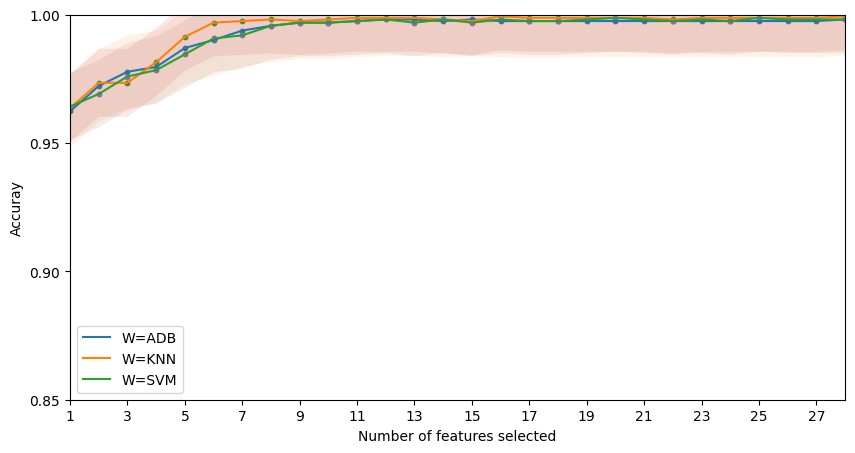

In [28]:
score_list_adb=acc_scores[0]
score_list_svm=acc_scores[1]
score_list_knn=acc_scores[2]

fig = plt.figure(figsize=(10, 5)) 
plt.plot( score_list_adb, label='W=ADB')
plt.scatter(np.arange(0,len(score_list_adb)),  score_list_adb, marker='o',s=10)
plt.fill_between(np.arange(len(score_list_adb)), score_list_adb - np.std(score_list_adb), score_list_adb + np.std(score_list_adb), alpha=0.1)

plt.plot( score_list_knn, label='W=KNN')
plt.scatter(np.arange(0,len(score_list_knn)),  score_list_knn, marker='o',s=10)
plt.fill_between(np.arange(len(score_list_knn)),  score_list_knn - np.std(score_list_knn), score_list_knn + np.std(score_list_knn), alpha=0.1)

plt.plot( score_list_svm, label='W=SVM')
plt.scatter(np.arange(0,len(score_list_svm)),  score_list_svm, marker='o',s=10)
plt.fill_between(np.arange(len(score_list_svm)), score_list_svm - np.std(score_list_svm), score_list_svm + np.std(score_list_svm), alpha=0.1)

if len(score_list_adb )<28:
    plt.legend(loc='lower left')
    plt.xticks(np.arange(1, 40, 2))
    #plt.yticks((np.arange(0.85, 1, 0.05)))
    plt.xlim(1, len(score_list_adb ))
    #plt.ylim(0.85,1)
    plt.xlabel('Number of features selected') 
    plt.ylabel('Accuray') 
else:
    plt.legend(loc='lower left')
    plt.xticks(np.arange(1, 40, 2))
    plt.yticks((np.arange(0.85, 1, 0.05)))
    plt.xlim(1, 28)
    plt.ylim(0.85,1)
    plt.xlabel('Number of features selected') 
    plt.ylabel('Accuray')   

In [35]:
best_feat=frequencyDict_svm[0:np.argmax(frequencyDict_svm)]
best_feat

array([38259, 33904, 33372, 36849, 37604, 38132, 32749, 36886, 37513,
       38045, 38042, 33447, 36643, 36900, 33277, 37865, 37667, 36807,
       36635, 38346, 33639, 38039, 33196, 33352, 38041, 38128, 34523,
       37644, 33890, 36928, 33460, 37864, 33545, 33279, 34433, 36890,
       36720, 37990, 37408, 36370, 35493, 33186, 35933, 37248, 37254,
       36018, 37203, 36526, 33289, 38393, 33817, 36724, 37406, 32041,
       37994, 38569, 36196, 35931, 33645, 36435, 33548, 38644, 33797,
       37418, 35577, 37381, 35142, 38028, 35379, 37824, 32221, 38480,
       36726, 36706, 33373, 33549, 38553, 35140, 38435, 36961, 37869,
       38572, 33368, 33273, 38289, 33107, 32129, 38571, 32396, 37428,
       33105, 33012, 35306, 36888, 33180])

#### Test Accuracy 

In [36]:
from sklearn.model_selection import StratifiedKFold
def cross_val_with_features(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf.fit(X_train, y_train)
        y_pred =rf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

test_scores=cross_val_with_features(xx[:,best_feat],yy)
test_scores
import statistics
print('mean Test score',sum(test_scores)/10,' std',statistics.stdev(test_scores))

mean Test score 0.9987654320987656  std 0.002602697662690036


### Extract brain information 

In [37]:
def extract_fc_info(feat_idx_ls):
    
    os.chdir('/home/otagouni/yuan_obesity/notebooks/datasets')
    #os.chdir('/home/jupy/SourceAnalysis')
    coordinates=np.loadtxt('88_areas-ROIcentroids.txt')[:,0:3]
    sensor= np.arange(0,88)#.astype(str)
    nodes1=np.zeros([2])
    nodes2=np.zeros([2])
    
    data=np.array(pd.read_csv('88_areas-ROI.csv',header=None))
    bands=['delta','theta','alpha','beta','gamma']
    
    for feat_idx in feat_idx_ls:
        if feat_idx//7744==0:
            e_color='BuGn'
        if feat_idx//7744==1:
            e_color='inferno'
        if feat_idx//7744==2:
            e_color='Oranges'
        if feat_idx//7744==3:
            e_color='Purples'
        if feat_idx//7744==4:
            e_color='Oranges'
            
        i=feat_idx-feat_idx//7744*7744
        chanel1=int((i)//88)
        name_chan1=sensor[chanel1]
        name_chan1_correctInd=name_chan1+1
        chanel2=int((i)%88)
        name_chan2=sensor[chanel2]
        name_chan2_correctInd=name_chan2+1
        
        #lobe 
        lobe1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],3]
        lobe2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],3]
        #structure
        structure1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],4]
        structure2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],4]
        #Brodmann area
        brod1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],5]
        brod2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],5]
        #ROI number
        roinumb1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],6]        
        roinumb2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],6]   
        
        nodes1=np.vstack([nodes1,np.array([name_chan1,name_chan2])])
        nodes2=np.vstack([nodes2,np.array([name_chan2,name_chan1])])
        
        print(feat_idx,';',bands[feat_idx//7744],';',lobe1,'-',lobe2,';',structure1,'-',structure2,';',
              brod1,'-',brod2,';',roinumb1,'-',roinumb2)
        print(' ')

#### Feature Selection Phase 2: Sequentially Select the Most Significant Features

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel, wilcoxon, shapiro
import numpy as np

# Define your random forest model
rf = RandomForestClassifier(random_state=42)

def cross_val_with_features(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

def test_features_incrementally(X, y, best_feat):
    previous_accuracies = []
    final_selected_features = None  # To store the feature set when p < 0.05 for the second time
    p_value_below_count = 0  # Counter to track how many times p < 0.05 is encountered

    # Test the contribution of each feature incrementally
    for i in range(1, len(best_feat) + 1):
        selected_features = best_feat[:i]
        X_selected = X[:, selected_features]
        current_accuracies = cross_val_with_features(X_selected, y)
        
        if previous_accuracies:
            # Perform Shapiro-Wilk test for normality on current and previous accuracies
            shapiro_current = shapiro(current_accuracies)
            shapiro_previous = shapiro(previous_accuracies)
            
            # Check if both distributions are normally distributed (p-value > 0.05)
            if shapiro_current.pvalue > 0.05 and shapiro_previous.pvalue > 0.05:
                # Use paired t-test if both distributions are normal
                t_stat, p_value = ttest_rel(previous_accuracies, current_accuracies)
                test_name = "Paired t-test"
            else:
                # Check if the current and previous accuracies are identical
                if np.array_equal(previous_accuracies, current_accuracies):
                    print(f"Using features {selected_features}: Mean accuracy = {np.mean(current_accuracies):.4f} (No difference from previous, skipping Wilcoxon test)")
                    test_name = "No test (identical results)"
                    p_value = 1.0  # Set a high p-value since no test is conducted
                else:
                    # Use Wilcoxon signed-rank test for non-normal distributions
                    t_stat, p_value = wilcoxon(previous_accuracies, current_accuracies)
                    test_name = "Wilcoxon test"
            
            # If a test was performed, display p-value
            if test_name != "No test (identical results)":
                print(f"Using features {selected_features}: Mean accuracy = {np.mean(current_accuracies):.4f}, {test_name} p-value = {p_value:.4f}")
            
            # Track the number of times p-value < 0.05
            if p_value < 0.05:
                p_value_below_count += 1
                print(f"P-value less than 0.05 encountered {p_value_below_count} time(s)")

                # If the p-value < 0.05 for the second time, stop and return the feature set
                if p_value_below_count == 2:
                    final_selected_features = selected_features
                    print(f"Stopping: P-value < 0.05 found for the second time at feature set {selected_features}.")
                    break
        
        else:
            print(f"Using features {selected_features}: Mean accuracy = {np.mean(current_accuracies):.4f}")
        
        # Update previous accuracies
        previous_accuracies = current_accuracies
        print('------------------------------')

    return final_selected_features

# Assuming `xx`, `yy`, and `best_feat` are already defined in your environment
final_features = test_features_incrementally(xx, yy, best_feat)

# Output the final selected features where p < 0.05 for the second time
print(f"Final selected features (p < 0.05 for the second time): {final_features}")



Using features [38259]: Mean accuracy = 0.9438
------------------------------
Using features [38259 33904]: Mean accuracy = 0.9679, Paired t-test p-value = 0.0087
------------------------------
Using features [38259 33904 33372]: Mean accuracy = 0.9753, Wilcoxon test p-value = 0.0277
------------------------------
Using features [38259 33904 33372 36849]: Mean accuracy = 0.9772, Wilcoxon test p-value = 0.7649
Stopping: P-value greater than 0.05 found at feature set [38259 33904 33372 36849].
Final selected features (p < 0.05): [38259 33904 33372]


# Break Below

In [44]:
best_feat_min=final_features 
best_feat_permu_min=best_feat_min

In [45]:
extract_fc_info(best_feat_min)

38259 ; gamma ; Frontal Lobe - Temporal Lobe ; Orbital Gyrus - Middle Temporal Gyrus ; Brodmann area 47 - Brodmann area 39 ; 83 - 68
 
33904 ; gamma ; Temporal Lobe - Occipital Lobe ; Middle Temporal Gyrus - Lingual Gyrus ; Brodmann area 21 - Brodmann area 17 ; 34 - 25
 
33372 ; gamma ; Occipital Lobe - Frontal Lobe ; Fusiform Gyrus - Rectal Gyrus ; Brodmann area 18 - Brodmann area 11 ; 28 - 21
 


### Test minimum best model per Stage per Timepoint

In [29]:
#### Accuracy per stage per time

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def acc_per_stage_per_tps(best_feat, time_point):
    subj_len = int(Xdata_ob[0].shape[0] / 3)
    
    # Adjust n_splits based on subj_len
    if subj_len < 25:
        n_splits = 4
    else:
        n_splits = 10

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    allstage_score = []
    for stage, obese_data in zip(['PWL', '3MON', 'BL'], 
                                 [Xdata_ob[time_point][:subj_len, :], 
                                  Xdata_ob[time_point][subj_len:subj_len*2, :], 
                                  Xdata_ob[time_point][subj_len*2:, :]]):
        Xdata = np.vstack([obese_data[:, best_feat], Xdata_Lean[time_point][:subj_len, :][:, best_feat]])
        Ydata = np.hstack([np.zeros(subj_len), np.ones(subj_len)])

        avg_score = []  # Initialize avg_score within the loop to reset for each stage
        
        fold = 0
        for train_index, test_index in skf.split(Xdata, Ydata):
            fold += 1
            Xtv = Xdata[train_index]
            Ytv = Ydata[train_index]
            Xtest = Xdata[test_index]
            Ytest = Ydata[test_index]
    
            rf.fit(Xtv, Ytv)
            avg_score.append(accuracy_score(rf.predict(Xtest), Ytest))
        
        allstage_score.append(avg_score)
    
    # Calculate average accuracy across folds for each stage
    return (
        sum(allstage_score[0]) / n_splits, 
        sum(allstage_score[1]) / n_splits, 
        sum(allstage_score[2]) / n_splits
    )

In [48]:
time_points = [0, 15, 30, 45, 60, 90, 120, 180, 240]
pwl_acc_list = []
mon3_acc_list = []
bl_acc_list = []

# Calculate the accuracy for each time point
for time_point in time_points:
    pwl_acc, mon3_acc, bl_acc = acc_per_stage_per_tps(best_feat_permu_min,time_point)
    pwl_acc_list.append(pwl_acc)
    mon3_acc_list.append(mon3_acc)
    bl_acc_list.append(bl_acc)

In [49]:
from scipy.stats import ttest_ind, levene, mannwhitneyu, shapiro

def compare_lists(list1, list2, name1, name2):
    # Perform Shapiro-Wilk test for normality on both lists
    shapiro_list1 = shapiro(list1)
    shapiro_list2 = shapiro(list2)
    
    print(f"Shapiro-Wilk test p-values: {name1} = {shapiro_list1.pvalue:.4f}, {name2} = {shapiro_list2.pvalue:.4f}")
    
    # Check if both distributions are normally distributed (p-value > 0.05)
    if shapiro_list1.pvalue > 0.05 and shapiro_list2.pvalue > 0.05:
        # Check for equality of variances using Levene's Test
        stat, p_value_levene = levene(list1, list2)
        equal_var = p_value_levene > 0.05
        
        
        # Perform an independent t-test
        t_stat, p_value = ttest_ind(list1, list2, equal_var=equal_var)
        test_name = "Independent t-test"
    else:
        # Use Mann-Whitney U test if either distribution is not normal
        t_stat, p_value = mannwhitneyu(list1, list2)
        test_name = "Mann-Whitney U test"
    
    print(f"{test_name} ({name1} vs {name2}): statistic={t_stat:.4f}, p-value={p_value:.4f}\n")

# Compare the lists in pairs
compare_lists(pwl_acc_list, mon3_acc_list, "pwl_acc_list", "mon3_acc_list")
compare_lists(pwl_acc_list, bl_acc_list, "pwl_acc_list", "bl_acc_list")
compare_lists(mon3_acc_list, bl_acc_list, "mon3_acc_list", "bl_acc_list")


Shapiro-Wilk test p-values: pwl_acc_list = 0.2978, mon3_acc_list = 0.6962
Independent t-test (pwl_acc_list vs mon3_acc_list): statistic=-0.7083, p-value=0.4889

Shapiro-Wilk test p-values: pwl_acc_list = 0.2978, bl_acc_list = 0.0979
Independent t-test (pwl_acc_list vs bl_acc_list): statistic=-0.1681, p-value=0.8686

Shapiro-Wilk test p-values: mon3_acc_list = 0.6962, bl_acc_list = 0.0979
Independent t-test (mon3_acc_list vs bl_acc_list): statistic=0.3610, p-value=0.7228



(0.5, 1.0)

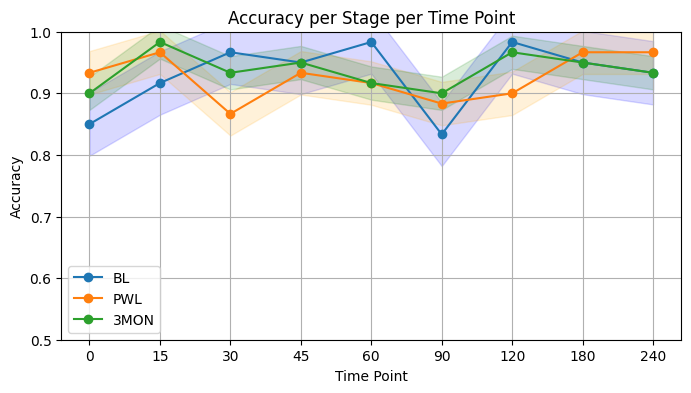

In [50]:
time_points_str = [str(tp) for tp in time_points]
plt.figure(figsize=(8, 4))

plt.plot(time_points_str, bl_acc_list, label='BL', marker='o')
plt.fill_between(time_points_str, bl_acc_list -  np.std(bl_acc_list), bl_acc_list + np.std(bl_acc_list), alpha=0.15,color='blue')

plt.plot(time_points_str, pwl_acc_list, label='PWL', marker='o')
plt.fill_between(time_points_str, pwl_acc_list -  np.std(pwl_acc_list), pwl_acc_list + np.std(pwl_acc_list), alpha=0.15,color='orange')

plt.plot(time_points_str, mon3_acc_list, label='3MON', marker='o')
plt.fill_between(time_points_str, mon3_acc_list -  np.std(mon3_acc_list), mon3_acc_list + np.std(mon3_acc_list), alpha=0.15, color='green')

plt.xlabel('Time Point')
plt.ylabel('Accuracy')
plt.title('Accuracy per Stage per Time Point')
plt.legend()
plt.grid(True)

if int(Xdata_ob[0].shape[0] / 3)<25:
    plt.ylim(0, 1)
else:    
    plt.ylim(0.5, 1)

### Model Significance Test

In [51]:
def swap_labels(X, y, n, swap_ratio):
    np.random.seed(42)  # For reproducibility
    X_swapped, y_swapped = X.copy(), y.copy()    
    for _ in range(n):
        pain_indices = np.where(y_swapped == 1)[0]
        healthy_indices = np.where(y_swapped == 0)[0]
        num_to_swap = int(min(len(pain_indices), len(healthy_indices)) * swap_ratio)
        pain_to_healthy_indices = np.random.choice(pain_indices, size=num_to_swap, replace=False)
        healthy_to_pain_indices = np.random.choice(healthy_indices, size=num_to_swap, replace=False)
        y_swapped[pain_to_healthy_indices], y_swapped[healthy_to_pain_indices] = \
        y[healthy_to_pain_indices], y[pain_to_healthy_indices]    
    return X_swapped, y_swapped

shuf acc 0.4858333333333335 shuf std 0.14890876921397728
real acc 0.8741666666666665 real std 0.07900812585182161
shuf acc 0.505 shuf std 0.14546068309160723
real acc 0.9241666666666668 real std 0.06497754943374874
shuf acc 0.49583333333333335 shuf std 0.14476217967556995
real acc 0.9575000000000002 real std 0.062107352481998716
shuf acc 0.49500000000000005 shuf std 0.16404503775114446
real acc 0.9408333333333334 real std 0.06626033578820313
shuf acc 0.5024999999999998 shuf std 0.1352840259482533
real acc 0.9516666666666669 real std 0.05943523954031283
shuf acc 0.5208333333333335 shuf std 0.15046458170587415
real acc 0.8175 real std 0.08759714825034952
shuf acc 0.5208333333333334 shuf std 0.13882574322120633
real acc 0.9875 real std 0.029905856773553074
shuf acc 0.5225 shuf std 0.1349725623695149
real acc 0.9333333333333337 real std 0.07106690545187015
shuf acc 0.5166666666666665 shuf std 0.1611024031084503
real acc 0.9575000000000002 real std 0.05362164286567428
The data is not normal

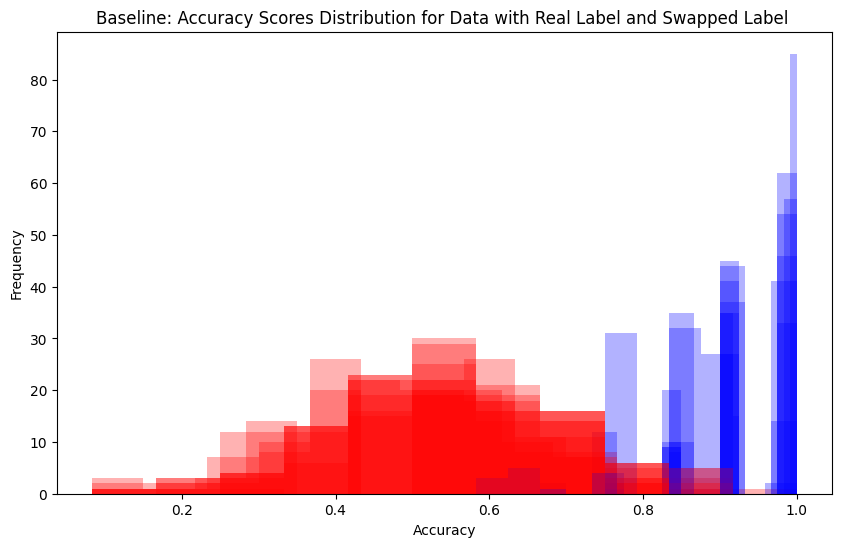

In [52]:
fig, ax = plt.subplots(figsize=(10, 6)) 
subj_len= int(Xdata_ob[0].shape[0] / 3) #30

swap_ratio = 0.5
num_splits =100

for t in range(0,9): 
    shuffled_acc = []
    non_shuffled_acc = []
    
    xx = np.vstack([ X_bl_ob[t*subj_len:(t+1)*subj_len,best_feat_permu_min], X_bl_lean[t*subj_len:(t+1)*subj_len,best_feat_permu_min]]) 
    yy = np.hstack([np.zeros(subj_len), np.ones(subj_len)])
    for i in range(num_splits):
        X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=i, stratify=yy)
        X_swapped, y_swapped = swap_labels(X_train, y_train, 1, swap_ratio)
        rf.fit(X_train, y_swapped)
        score = accuracy_score(y_test, rf.predict(X_test))
        shuffled_acc.append(score)
    print('shuf acc',sum(shuffled_acc)/len(shuffled_acc),'shuf std',statistics.stdev(shuffled_acc)) 

    for i in range(num_splits):
        X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=i, stratify=yy)
        rf.fit(X_train, y_train)
        score = accuracy_score(y_test, rf.predict(X_test))
        non_shuffled_acc.append(score) 
    print('real acc',sum(non_shuffled_acc)/len(non_shuffled_acc),'real std',statistics.stdev(non_shuffled_acc))    
    
    ax.hist(shuffled_acc, bins=10, alpha=0.3, color='red')  
    ax.hist(non_shuffled_acc, bins=10, alpha=0.3, color='blue') 
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
handles = [plt.Rectangle((0, 0), 1, 1, color='red', alpha=0.3),
           plt.Rectangle((0, 0), 1, 1, color='blue', alpha=0.3)]
labels = ['shuffled label (random classification)', 'original label (real classification)']
plt.title('Baseline: Accuracy Scores Distribution for Data with Real Label and Swapped Label ')

from scipy.stats import shapiro, ttest_rel, wilcoxon
stat, p_value = shapiro(shuffled_acc)
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0).")    
    t_stat, t_p_value = ttest_rel(shuffled_acc, non_shuffled_acc)
    print(f"Paired t-test: t-statistic={t_stat:.4f}, p-value={t_p_value:.4f}")
else:
    print("The data is not normally distributed (reject H0).")
    w_stat, w_p_value = wilcoxon(shuffled_acc, non_shuffled_acc)
    print(f"Wilcoxon test: statistic={w_stat:.4f}, p-value={w_p_value:.4f}")

shuf acc 0.49333333333333335 shuf std 0.14393850788314913
real acc 0.9291666666666668 real std 0.06634497300716996
shuf acc 0.5250000000000001 shuf std 0.14482273695898654
real acc 0.9383333333333332 real std 0.07069083507683885
shuf acc 0.5191666666666667 shuf std 0.16190807759103804
real acc 0.8299999999999998 real std 0.10252152055704618
shuf acc 0.4875 shuf std 0.16213320859356356
real acc 0.9083333333333333 real std 0.08823942025078862
shuf acc 0.4866666666666666 shuf std 0.15155386710751165
real acc 0.8800000000000001 real std 0.09572805665283034
shuf acc 0.5008333333333335 shuf std 0.1697918280452023
real acc 0.8758333333333332 real std 0.08162817755832052
shuf acc 0.5183333333333334 shuf std 0.1617888912821644
real acc 0.8716666666666667 real std 0.09053091937296355
shuf acc 0.53 shuf std 0.12508134278144353
real acc 0.9233333333333336 real std 0.08838239537061558
shuf acc 0.5183333333333332 shuf std 0.16941339341257686
real acc 0.961666666666667 real std 0.054818340954925895
T

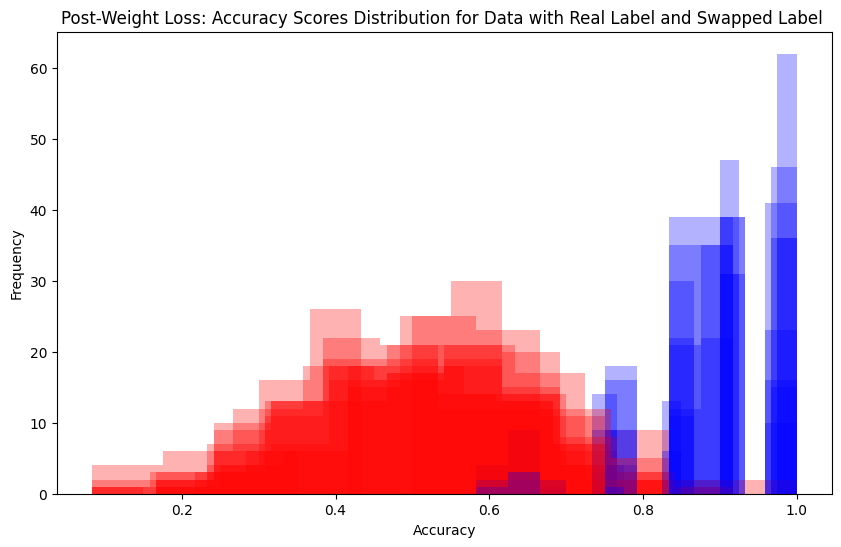

In [53]:

fig, ax = plt.subplots(figsize=(10, 6)) 

swap_ratio = 0.5
num_splits =100
subj_len= int(Xdata_ob[0].shape[0] / 3) #30

for t in range(0,9): 
    shuffled_acc = []
    non_shuffled_acc = []
    
    xx = np.vstack([ X_pwl_ob[t*subj_len:(t+1)*subj_len,best_feat_permu_min], X_bl_lean[t*subj_len:(t+1)*subj_len,best_feat_permu_min]]) 
    yy = np.hstack([np.zeros(subj_len), np.ones(subj_len)])
    for i in range(num_splits):
        X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=i, stratify=yy)
        X_swapped, y_swapped = swap_labels(X_train, y_train, 1, swap_ratio)
        rf.fit(X_train, y_swapped)
        score = accuracy_score(y_test, rf.predict(X_test))
        shuffled_acc.append(score)
    print('shuf acc',sum(shuffled_acc)/len(shuffled_acc),'shuf std',statistics.stdev(shuffled_acc)) 

    for i in range(num_splits):
        X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=i, stratify=yy)
        rf.fit(X_train, y_train)
        score = accuracy_score(y_test, rf.predict(X_test))
        non_shuffled_acc.append(score) 
    print('real acc',sum(non_shuffled_acc)/len(non_shuffled_acc),'real std',statistics.stdev(non_shuffled_acc))    
    
    ax.hist(shuffled_acc, bins=10, alpha=0.3, color='red')  
    ax.hist(non_shuffled_acc, bins=10, alpha=0.3, color='blue')  
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
handles = [plt.Rectangle((0, 0), 1, 1, color='red', alpha=0.3),
           plt.Rectangle((0, 0), 1, 1, color='blue', alpha=0.3)]
labels = ['shuffled label (random classification)', 'original label (real classification)']
plt.title('Post-Weight Loss: Accuracy Scores Distribution for Data with Real Label and Swapped Label ')

from scipy.stats import shapiro, ttest_rel, wilcoxon
stat, p_value = shapiro(shuffled_acc)
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0).")    
    t_stat, t_p_value = ttest_rel(shuffled_acc, non_shuffled_acc)
    print(f"Paired t-test: t-statistic={t_stat:.4f}, p-value={t_p_value:.4f}")
else:
    print("The data is not normally distributed (reject H0).")
    w_stat, w_p_value = wilcoxon(shuffled_acc, non_shuffled_acc)
    print(f"Wilcoxon test: statistic={w_stat:.4f}, p-value={w_p_value:.4f}")

shuf acc 0.5016666666666668 shuf std 0.1674979270186815
real acc 0.8883333333333334 real std 0.08721594907634979
shuf acc 0.5225000000000002 shuf std 0.16363188203116005
real acc 0.9816666666666672 real std 0.03469443332443556
shuf acc 0.5075000000000003 shuf std 0.15033399030816455
real acc 0.9216666666666669 real std 0.06018583268234966
shuf acc 0.5058333333333335 shuf std 0.15545406140603685
real acc 0.9408333333333335 real std 0.07036760139865027
shuf acc 0.4833333333333332 shuf std 0.14409436987562732
real acc 0.8958333333333331 real std 0.08322804796806563
shuf acc 0.5133333333333334 shuf std 0.16054410850109316
real acc 0.9049999999999997 real std 0.08207808824616898
shuf acc 0.5125 shuf std 0.1513941014763806
real acc 0.9683333333333337 real std 0.04851903256211101
shuf acc 0.5124999999999998 shuf std 0.13367748094325976
real acc 0.9275000000000005 real std 0.08003138413578209
shuf acc 0.5266666666666664 shuf std 0.1552847570755818
real acc 0.934166666666667 real std 0.05716727

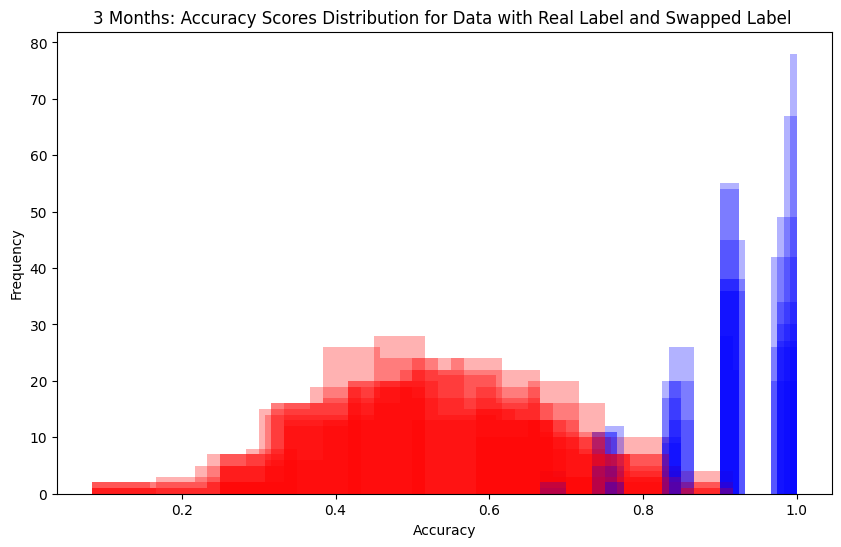

In [54]:

fig, ax = plt.subplots(figsize=(10, 6)) 

subj_len= int(Xdata_ob[0].shape[0] / 3) #30
swap_ratio = 0.5
num_splits =100

for t in range(0,9): 
    shuffled_acc = []
    non_shuffled_acc = []
    
    xx = np.vstack([ X_3mon_ob[t*subj_len:(t+1)*subj_len,best_feat_permu_min], X_bl_lean[t*subj_len:(t+1)*subj_len,best_feat_permu_min]]) 
    yy = np.hstack([np.zeros(subj_len), np.ones(subj_len)])
    for i in range(num_splits):
        X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=i, stratify=yy)
        X_swapped, y_swapped = swap_labels(X_train, y_train, 1, swap_ratio)
        rf.fit(X_train, y_swapped)
        score = accuracy_score(y_test, rf.predict(X_test))
        shuffled_acc.append(score)
    print('shuf acc',sum(shuffled_acc)/len(shuffled_acc),'shuf std',statistics.stdev(shuffled_acc)) 

    for i in range(num_splits):
        X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=i, stratify=yy)
        rf.fit(X_train, y_train)
        score = accuracy_score(y_test, rf.predict(X_test))
        non_shuffled_acc.append(score) 
    print('real acc',sum(non_shuffled_acc)/len(non_shuffled_acc),'real std',statistics.stdev(non_shuffled_acc))    
    
    ax.hist(shuffled_acc, bins=10, alpha=0.3, color='red')  
    ax.hist(non_shuffled_acc, bins=10, alpha=0.3, color='blue')  
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
handles = [plt.Rectangle((0, 0), 1, 1, color='red', alpha=0.3),
           plt.Rectangle((0, 0), 1, 1, color='blue', alpha=0.3)]
labels = ['shuffled label (random classification)', 'original label (real classification)']
plt.title('3 Months: Accuracy Scores Distribution for Data with Real Label and Swapped Label ')

from scipy.stats import shapiro, ttest_rel, wilcoxon
stat, p_value = shapiro(shuffled_acc)
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0).")    
    t_stat, t_p_value = ttest_rel(shuffled_acc, non_shuffled_acc)
    print(f"Paired t-test: t-statistic={t_stat:.4f}, p-value={t_p_value:.4f}")
else:
    print("The data is not normally distributed (reject H0).")
    w_stat, w_p_value = wilcoxon(shuffled_acc, non_shuffled_acc)
    print(f"Wilcoxon test: statistic={w_stat:.4f}, p-value={w_p_value:.4f}")

In [ ]:
# Feature Interpretation

In [55]:
Original_features=best_feat_permu_min

def extract_feat_info(feat_idx_ls):
   
    #os.chdir('/home/jupy/SourceAnalysis')
    coordinates=np.loadtxt('88_areas-ROIcentroids.txt')[:,0:3]
    sensor= np.arange(0,88)#.astype(str)
    nodes1=np.zeros([2])
    nodes2=np.zeros([2])
    
    data=np.array(pd.read_csv('88_areas-ROI.csv',header=None))
    bands=['delta','theta','alpha','beta','gamma']
    featid_info=[]
    structure_info=[]
    band_info=[]
    for feat_idx in feat_idx_ls:
        if feat_idx//7744==0:
            e_color='BuGn'
        if feat_idx//7744==1:
            e_color='inferno'
        if feat_idx//7744==2:
            e_color='Oranges'
        if feat_idx//7744==3:
            e_color='Purples'
        if feat_idx//7744==4:
            e_color='Oranges'
        #print(feat_idx)
            
        i=feat_idx-feat_idx//7744*7744
        chanel1=int((i)//88)
        name_chan1=sensor[chanel1]
        name_chan1_correctInd=name_chan1+1
        chanel2=int((i)%88)
        name_chan2=sensor[chanel2]
        name_chan2_correctInd=name_chan2+1
        
        #lobe 
        lobe1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],3]
        lobe2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],3]
        #structure
        structure1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],4]
        structure2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],4]
        #Brodmann area
        brod1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],5]
        brod2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],5]
        #ROI number
        roinumb1=data[np.where(data[:,-1]==name_chan1_correctInd)[0][0],6]        
        roinumb2=data[np.where(data[:,-1]==name_chan2_correctInd)[0][0],6]   
        
        nodes1=np.vstack([nodes1,np.array([name_chan1,name_chan2])])
        nodes2=np.vstack([nodes2,np.array([name_chan2,name_chan1])])
        
        print('feature_id: ',feat_idx,';',bands[feat_idx//7744],';',lobe1,'-',lobe2,';',structure1,'-',structure2,';',
              brod1,'-',brod2,';',roinumb1,'-',roinumb2)
        #print(' ')
        structure_info.append(f'{brod1} - {brod2}')
        featid_info.append(feat_idx)
        band_info.append(bands[feat_idx//7744])
    return featid_info,structure_info,band_info

In [58]:
featid,featStruc,feat_band=extract_feat_info(Original_features)
#featStruc=['47L - 39L','21L - 17L', '18R - 11L']

feature_id:  38259 ; gamma ; Frontal Lobe - Temporal Lobe ; Orbital Gyrus - Middle Temporal Gyrus ; Brodmann area 47 - Brodmann area 39 ; 83 - 68
feature_id:  33904 ; gamma ; Temporal Lobe - Occipital Lobe ; Middle Temporal Gyrus - Lingual Gyrus ; Brodmann area 21 - Brodmann area 17 ; 34 - 25
feature_id:  33372 ; gamma ; Occipital Lobe - Frontal Lobe ; Fusiform Gyrus - Rectal Gyrus ; Brodmann area 18 - Brodmann area 11 ; 28 - 21


In [59]:
from scipy.stats import mannwhitneyu
reject_array=[]
pvalue_array=[]
sigstar_array=[]
for tp in [0,15,30,45, 60,90,120,180,240]:
    featStruc
    col_struc=[]
    for i in featStruc:
        col_struc.append([f'{i}']*subj_len*3)
    col_struc=col_struc+col_struc
    col_struc=np.array(col_struc).reshape(-1)

    col_featvalue_ob=[]
    col_featvalue_lean=[]
    for feat in Original_features:
        aa=Xdata_ob[tp][:, feat]
        bb=  Xdata_Lean[tp][:, feat]

        col_featvalue_ob.append(aa)
        col_featvalue_lean.append(bb)
    col_featvalue_ob=np.array(col_featvalue_ob).reshape(-1)
    col_featvalue_lean=np.array(col_featvalue_lean).reshape(-1)
    #print(col_featvalue_ob.shape)
    #print(col_featvalue_lean.shape)
    col_featvalue=np.hstack([col_featvalue_ob,col_featvalue_lean])

    col_featid=[]
    for feat in Original_features:
        col_featid.append( np.array([feat]*subj_len*3).astype(str) )

    col_featid=col_featid+col_featid
    col_featid=np.array(col_featid).reshape(-1)
    col_featid
    #print(col_featid.shape)

    col_group=['Obese']*int(col_featvalue.shape[0]/2)+['Lean']*int(col_featvalue.shape[0]/2)
    col_group=np.array(col_group)
    #print(col_group.shape)

    df_simulated = pd.DataFrame({ 'Feature_ID':col_featid,'Feature_Structure':col_struc,'Feature_Value': col_featvalue,'Group': col_group})

    plt.rcParams.update({'font.size': 9})
    import matplotlib.pyplot as plt
    import seaborn as sns
    from statannot import add_stat_annotation
    from scipy.stats import ttest_ind
    import os
    from statsmodels.stats.multitest import multipletests



    # Define box pairs for annotation
    unique_features = df_simulated["Feature_Structure"].unique()
    box_pairs = [((feature, "Obese"), (feature, "Lean")) for feature in unique_features]
    box_pairs = [((feature, "Lean"), (feature, "Obese")) for feature in unique_features]
    # Perform t-tests
    p_values = []
    for pair in box_pairs:
        group1 = df_simulated[(df_simulated['Feature_Structure'] == pair[0][0]) & (df_simulated['Group'] == pair[0][1])]['Feature_Value']
        group2 = df_simulated[(df_simulated['Feature_Structure'] == pair[1][0]) & (df_simulated['Group'] == pair[1][1])]['Feature_Value']
        #t_stat, p_val = ttest_ind(group1, group2)
        t_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
        p_values.append(p_val)

        reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

        # Output the results
    print("Reject null hypothesis for these comparisons:", reject)
    print("Corrected p-values:", [f'{pval:.4f}' for pval in pvals_corrected])
    def get_significance_level(p):
        if p < 0.0001:
            return "***"
        elif p < 0.01:
            return "**"
        elif p < 0.05:
            return "*"
        else:
            return "ns"

    # Get significance level annotations for each feature
    significance_levels = [get_significance_level(p) for p in pvals_corrected]
    significance_levels
    
    reject_array.append(reject)
    pvalue_array.append(pvals_corrected)
    sigstar_array.append(significance_levels)
    
pvalue_array=np.array(pvalue_array)

Reject null hypothesis for these comparisons: [False  True  True]
Corrected p-values: ['0.2626', '0.0076', '0.0085']
Reject null hypothesis for these comparisons: [ True False  True]
Corrected p-values: ['0.0000', '0.0529', '0.0000']
Reject null hypothesis for these comparisons: [ True  True  True]
Corrected p-values: ['0.0048', '0.0099', '0.0048']
Reject null hypothesis for these comparisons: [False False False]
Corrected p-values: ['0.1302', '0.1648', '0.0893']
Reject null hypothesis for these comparisons: [ True False  True]
Corrected p-values: ['0.0117', '0.0712', '0.0117']
Reject null hypothesis for these comparisons: [ True  True False]
Corrected p-values: ['0.0100', '0.0129', '0.2245']
Reject null hypothesis for these comparisons: [ True  True  True]
Corrected p-values: ['0.0162', '0.0000', '0.0085']
Reject null hypothesis for these comparisons: [ True  True  True]
Corrected p-values: ['0.0176', '0.0447', '0.0037']
Reject null hypothesis for these comparisons: [False False False

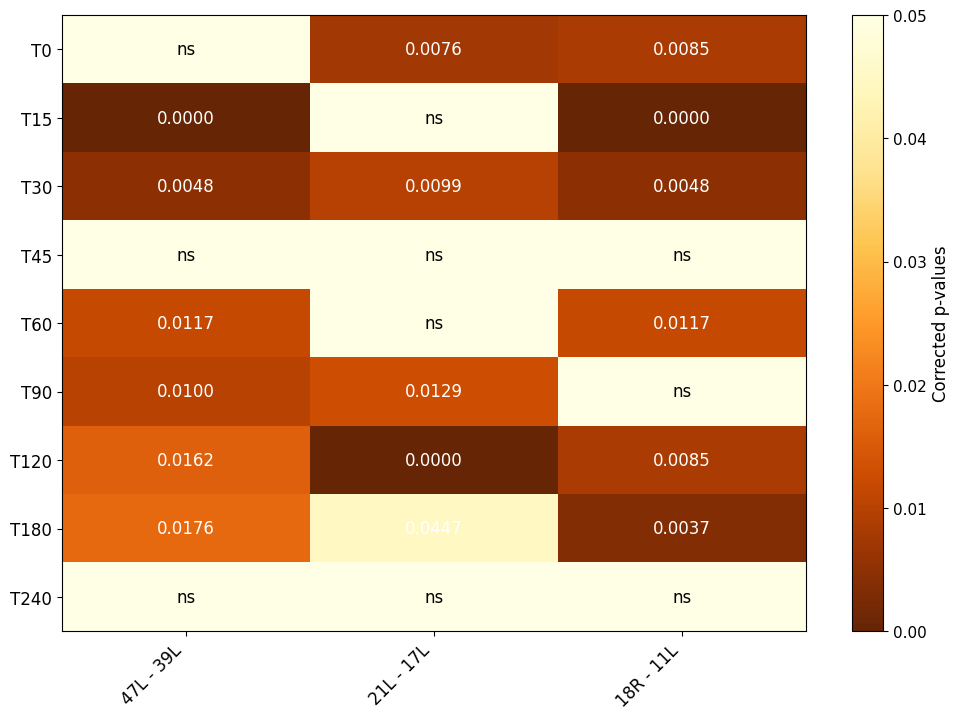

In [63]:
def assign_custom_colors(feature_index):
    color_palette = ['red', 'yellow', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'black', 'grey']
    feature_colors = {}
    for i, feature in enumerate(feature_index):
        feature_colors[feature] = color_palette[i % len(color_palette)]
    return feature_colors

# Define the feature and time indices
time_index = ["T0", "T15", "T30", "T45", "T60", "T90", "T120", "T180", "T240"]
feature_index = featStruc
if subj_len<25:
    custom_colors=assign_custom_colors(feature_index)
else:
    custom_colors = {
        feature_index[0]: '#D4A000',
        feature_index[1]: '#D4A000',
        feature_index[2]: 'green',
        feature_index[3]: 'red',
        feature_index[4]: 'red',
        feature_index[5]: 'red'
    }

# Create the heatmap with features on the x-axis and timepoints on the y-axis
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(pvalue_array, cmap='YlOrBr_r', aspect='auto', vmin=0, vmax=0.05)  # Increase color resolution for low p-values

# Add a color bar to indicate the scale
cbar = plt.colorbar(heatmap)
cbar.set_label('Corrected p-values', fontsize=12)  # Increase the color bar label font size
cbar.ax.tick_params(labelsize=11)  # Increase the font size of the color bar ticks

# Set the tick labels with custom colors
xticks = plt.xticks(np.arange(len(feature_index)), feature_index, rotation=45, ha='right', fontsize=12)
yticks = plt.yticks(np.arange(len(time_index)), time_index, fontsize=12)

for label in plt.gca().get_xticklabels():
    label.set_color(custom_colors.get(label.get_text(), 'black'))

# Annotate the heatmap with p-values or "ns" if p > 0.05, with white font and increased font size
for i in range(pvalue_array.shape[0]):
    for j in range(pvalue_array.shape[1]):
        value = pvalue_array[i, j]
        if value > 0.05:
            plt.text(j, i, 'ns', ha='center', va='center', color='black', fontsize=12)
        else:
            plt.text(j, i, f'{value:.4f}', ha='center', va='center', color='white', fontsize=12)


(810,)
(810,)
(1620,)
(1620,)
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

21L - 17L_Obese v.s. 21L - 17L_Lean: Custom statistical test, P_val:1.795e-10
47L - 39L_Obese v.s. 47L - 39L_Lean: Custom statistical test, P_val:1.513e-07
18R - 11L_Obese v.s. 18R - 11L_Lean: Custom statistical test, P_val:2.238e-11


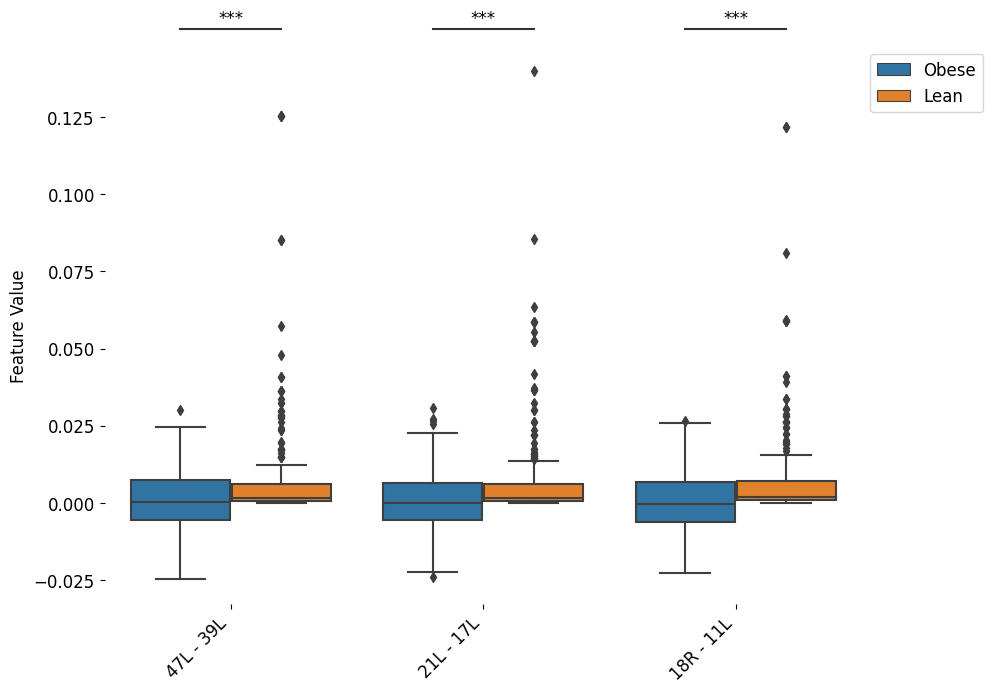

In [64]:
featStruc
col_struc=[]
for i in featStruc:
    col_struc.append([f'{i}']*subj_len*9)
col_struc=col_struc+col_struc
col_struc=np.array(col_struc).reshape(-1)

col_featvalue_ob=[]
col_featvalue_lean=[]
for feat in Original_features:
    aa=X_bl_ob[:, feat]
    bb=X_bl_lean[:, feat]
    col_featvalue_ob.append(aa)
    col_featvalue_lean.append(bb)
col_featvalue_ob=np.array(col_featvalue_ob).reshape(-1)
col_featvalue_lean=np.array(col_featvalue_lean).reshape(-1)
print(col_featvalue_ob.shape)
print(col_featvalue_lean.shape)
col_featvalue=np.hstack([col_featvalue_ob,col_featvalue_lean])

col_featid=[]
for feat in Original_features:
  # col_featid.append( np.array([feat]*90).astype(str) )
    col_featid.append( np.array([feat]*subj_len*9).astype(str) )
col_featid=col_featid+col_featid
col_featid=np.array(col_featid).reshape(-1)
col_featid
print(col_featid.shape)

col_group=['Obese']*int(col_featvalue.shape[0]/2)+['Lean']*int(col_featvalue.shape[0]/2)
col_group=np.array(col_group)
print(col_group.shape)

df_simulated = pd.DataFrame({ 'Feature_ID':col_featid,'Feature_Structure':col_struc,'Feature_Value': col_featvalue,'Group': col_group})

plt.rcParams.update({'font.size': 9})
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
import os

# Set up the plot
plt.figure(figsize=(10,7))

ax = sns.boxplot(x='Feature_Structure', y='Feature_Value', hue='Group', data=df_simulated)


unique_features = df_simulated["Feature_Structure"].unique()
box_pairs = [((feature, "Obese"), (feature, "Lean")) for feature in unique_features]
box_pairs = [((feature, "Lean"), (feature, "Obese")) for feature in unique_features]

p_values = []
for pair in box_pairs:
    group1 = df_simulated[(df_simulated['Feature_Structure'] == pair[0][0]) & (df_simulated['Group'] == pair[0][1])]['Feature_Value']
    group2 = df_simulated[(df_simulated['Feature_Structure'] == pair[1][0]) & (df_simulated['Group'] == pair[1][1])]['Feature_Value']
    t_stat, p_val =  mannwhitneyu(group1, group2, alternative='two-sided')
    p_values.append(p_val)
    
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')    

significance_annotations = ['***' if p < 0.0001 else
                            '**' if p < 0.001 else
                            '*' if p < 0.01 else
                            'ns' for p in pvals_corrected]


add_stat_annotation(ax, data=df_simulated, x='Feature_Structure', y='Feature_Value', hue='Group',
                    box_pairs=box_pairs, perform_stat_test=False, pvalues=p_values, test=None, text_format='star', loc='outside',
                    line_height=0.001, text_annot_custom=significance_annotations, fontsize=12)




ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.set_xlabel(None)  
plt.ylabel('Feature Value', fontsize=12)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)
for label in plt.gca().get_xticklabels():
    label.set_color(custom_colors.get(label.get_text(), 'black'))
plt.yticks(fontsize=12)

plt.tight_layout()